# Predicting Student Dropout and Academic Success

### Introduction
Student performance is the ultimate indicator for an educational institution to measure the quality of the services provided. Nowadays the studies offert is rich on multiple options and levels of expertise on the domains that form the job market. Analyzing how students perform is mandatory for institutions in order to improve and understand trends on the new genereations.

### Scope
* The **goal** of this project is to develop a deep understanding of the data available and implement Machine Learning algorithms to classify and possibly make insightful predictions, while enhancing the performance using multiple algorithms. 
  To achieve this, the project will develop around classificating and predicting the `Target` variable, whether a student Graduates, Drops Out or is still Enrolled in their studies.

* The [dataset](https://www.mdpi.com/2306-5729/7/11/146) was created by Valentim Realinho, Jorge Machado, Luís Baptista and Mónica V. Martins, members from the Research Center for Endogenous Resource Valorization, [Polytechnic Institute of Portalegre](https://www.ipportalegre.pt/pt/). It contains information of undergrad students from multiple nationalities.

These will be the steps towards the project goals:

1. Setup and feature inspection
2. Exploratory Data Analysis
3. Data Preparation 
4. Machine Learning model deployment
5. Fine-tuning
6. Evalution and Conclusions


## 1. Setup and Feature Inspection

### 1.1 Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
print(df.shape)
print(df.columns)

(4424, 35)
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without e

The dataset has 4424 entries corresponding to student information.

It also contains 35 features, which will be treated in depth next in order to make a full picture of all the data.

### 1.2 Feature Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

At first glance, apparently there's no missing data, and all data is composed of integer and float data unless `Target` feature.

Feature descriptions come from [Kaggle's](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention/data) entry for the dataset, the [official publication](https://www.mdpi.com/2306-5729/7/11/146), research from user [carmelh on Github](https://github.com/carmelh/SQL_projects/tree/main/student_data_analysis/Datasets) and personal research.

### 1.3 Feature Information



| Feature                                | Description                                                                                               |
|-----------------------------------------|-----------------------------------------------------------------------------------------------------------|
| Marital status                         | The marital status of the student, encoded as a discrete numeric value.                                   |
| Application mode                       | The method of application used by the student. (Categorical)                                              |
| Application order                      | The order in which the student applied. (Numerical)                                                       |
| Course                                 | The course taken by the student. (Categorical)                                                            |
| Daytime/evening attendance             | Whether the student attends classes during the day or in the evening. (Categorical)                       |
| Previous qualification                 | The qualification obtained by the student before enrolling in higher education. (Categorical)             |
| Nationality                            | The nationality of the student, represented as a discrete numeric code.                                   |
| Mother's qualification                 | The educational qualification level of the student's mother, encoded as a discrete numeric value.          |
| Father's qualification                 | The educational qualification level of the student's father, encoded as a discrete numeric value.          |
| Mother's occupation                    | The occupation of the student's mother, represented as a discrete numeric code.                           |
| Father's occupation                    | The occupation of the student's father, represented as a discrete numeric code.                           |
| Displaced                              | Indicates whether the student is considered displaced (binary: 0 = No, 1 = Yes).                          |
| Educational special needs               | Indicates if the student has special educational needs (binary: 0 = No, 1 = Yes).                         |
| Debtor                                 | Indicates whether the student has outstanding debts (binary: 0 = No, 1 = Yes).                            |
| Tuition fees up to date                 | Indicates if the student has paid all tuition fees up to date (binary: 0 = No, 1 = Yes).                  |
| Gender                                 | The gender of the student (binary: 0 = Male, 1 = Female).                                                 |
| Scholarship holder                     | Indicates if the student is receiving a scholarship (binary: 0 = No, 1 = Yes).                            |
| Age at enrollment                      | The age of the student at the time of enrollment in higher education (discrete numeric value).             |
| International                          | Indicates if the student is an international student (binary: 0 = No, 1 = Yes).                           |
| Curricular units 1st sem (credited)     | Number of curricular units the student was credited for in the first semester (discrete numeric value).    |
| Curricular units 1st sem (enrolled)     | Number of curricular units the student enrolled in during the first semester (discrete numeric value).     |
| Curricular units 1st sem (evaluations)  | Number of curricular units evaluated in the first semester (discrete numeric value).                       |
| Curricular units 1st sem (approved)     | Number of curricular units approved in the first semester (discrete numeric value).                        |
| Curricular units 1st sem (grade)        | Average grade of the student in the first semester curricular units (continuous numeric value).            |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluation in the first semester (discrete numeric value).         |
| Curricular units 2nd sem (credited)     | Number of curricular units credited in the second semester (discrete numeric value).                       |
| Curricular units 2nd sem (enrolled)     | Number of curricular units enrolled in the second semester (discrete numeric value).                       |
| Curricular units 2nd sem (evaluations)  | Number of curricular units evaluated in the second semester (discrete numeric value).                      |
| Curricular units 2nd sem (approved)     | Number of curricular units approved in the second semester (discrete numeric value).                       |
| Curricular units 2nd sem (grade)        | Average grade in the second semester curricular units (continuous numeric value).                          |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluation in the second semester (discrete numeric value).        |
| Unemployment rate                      | The unemployment rate in the country at the time of student enrollment (continuous numeric value).         |
| Inflation rate                         | The inflation rate in the country at the time of student enrollment (continuous numeric value).            |
| GDP                                    | The Gross Domestic Product of the country at the time of student enrollment (continuous numeric value).    |
| Target                                 | The outcome to predict: student dropout, academic success, or failure (categorical variable).              |

## 2. Exploratory Data Analysis

### 2.1. Univariate Analysis

In [4]:
eda = df.copy()

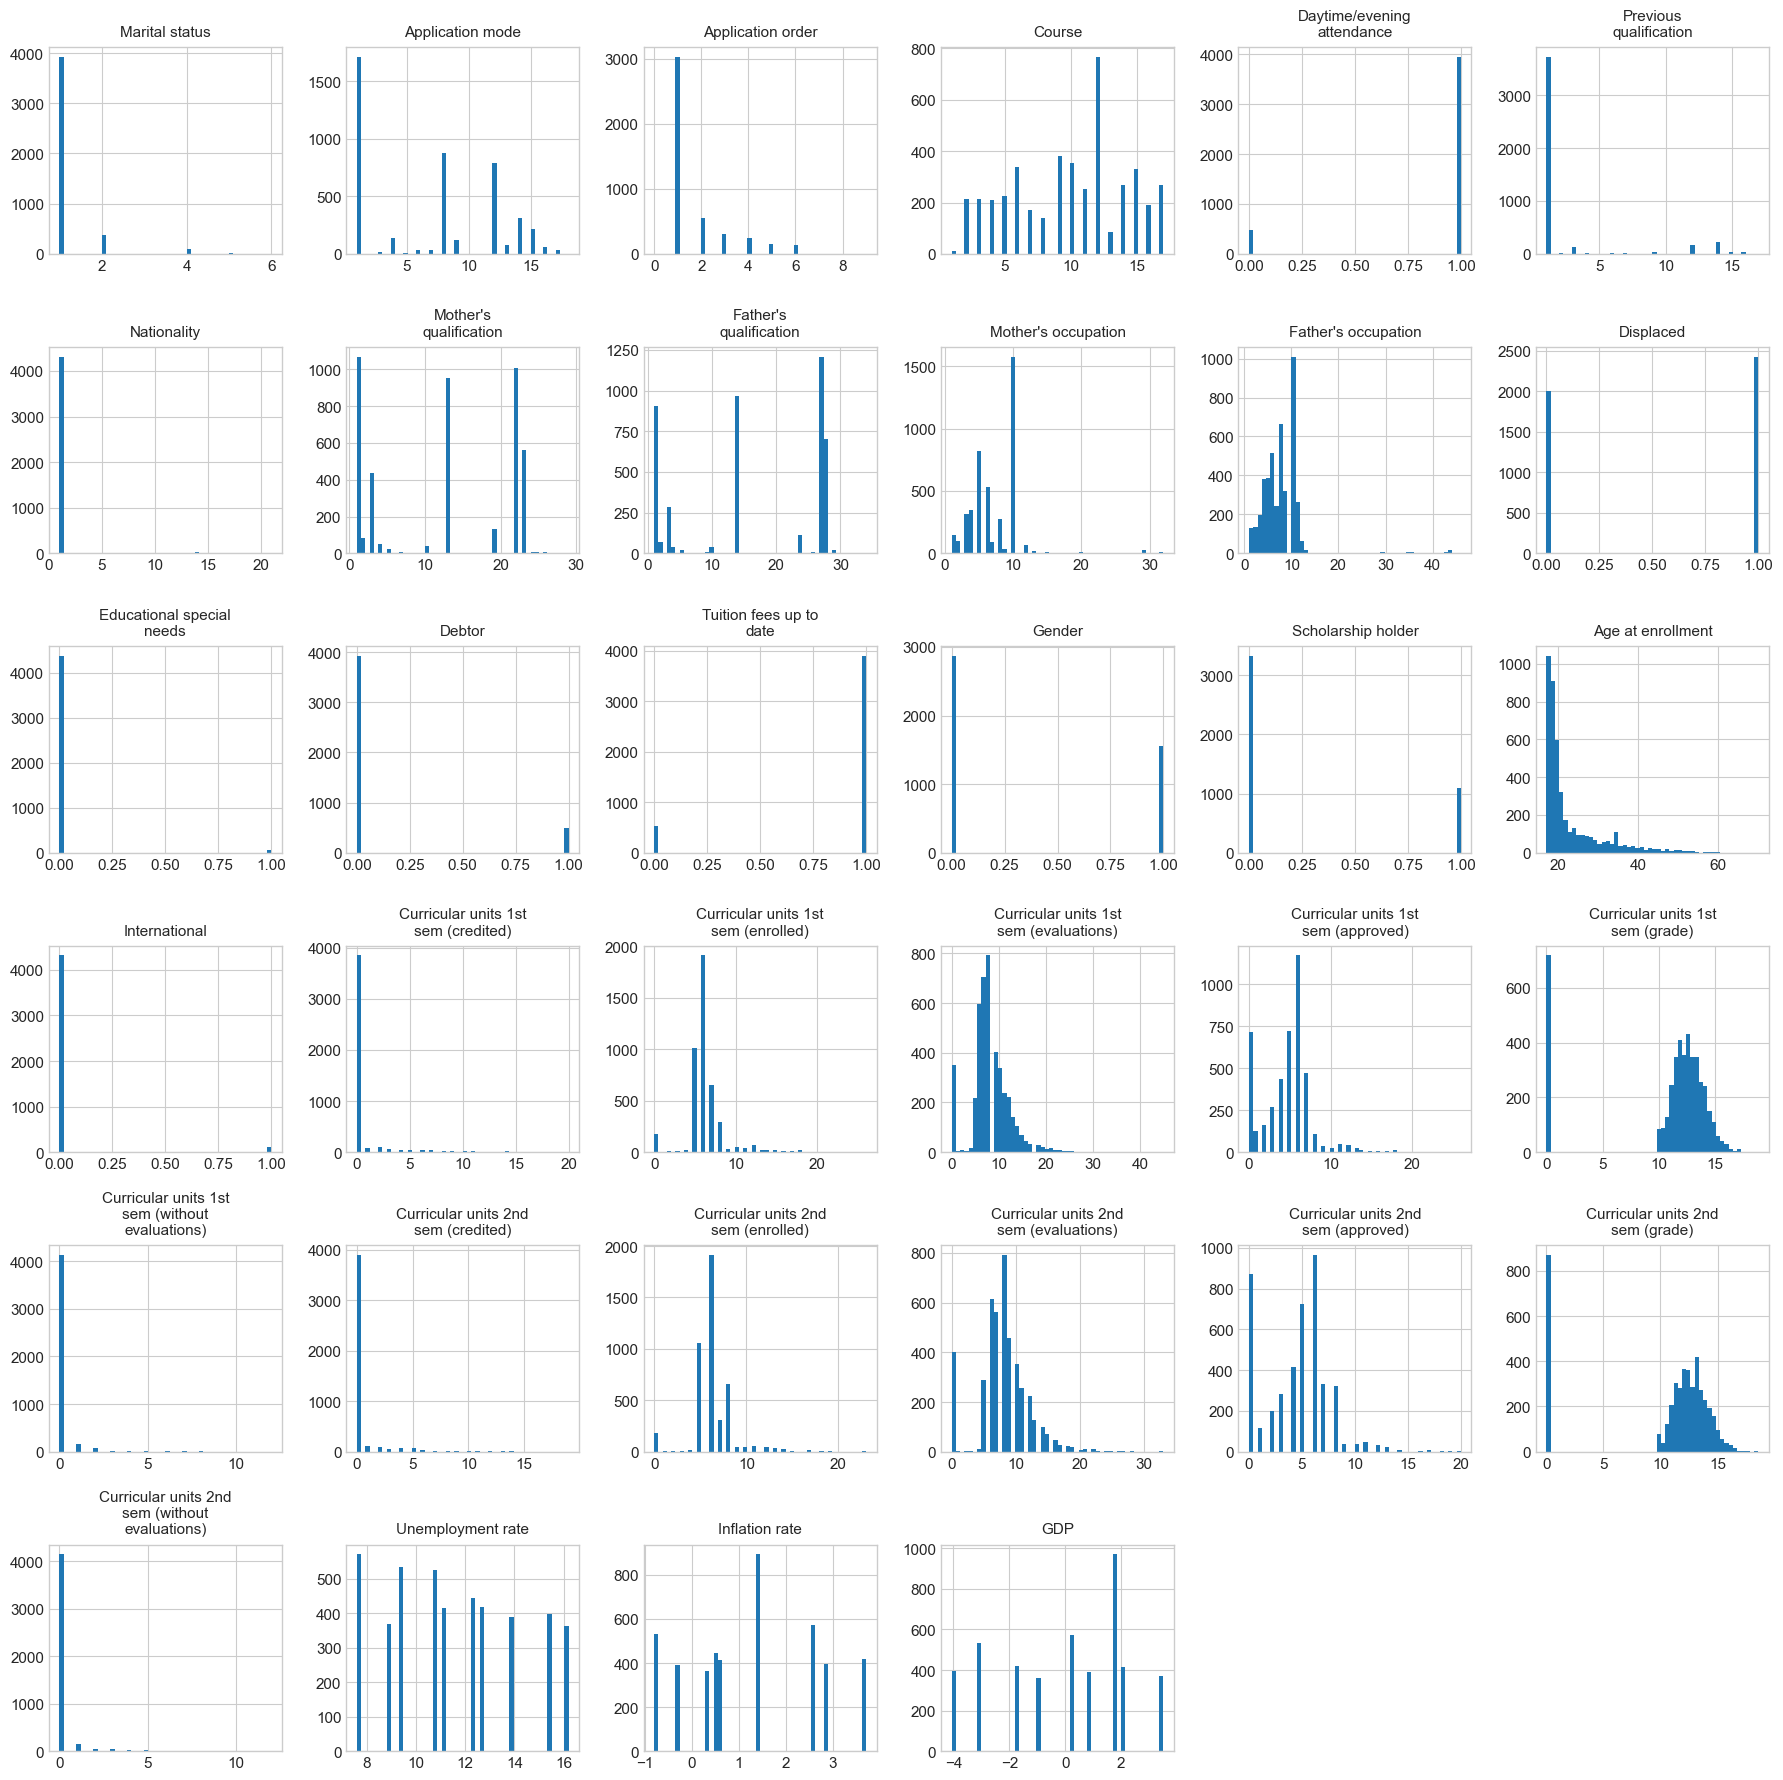

In [88]:
import textwrap

# Plot style configurations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'axes.titlesize': 16,     # Larger, readable subplot titles
    'axes.labelsize': 13,     # Axis label size
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'font.size': 13,           # General font size
    'legend.fontsize': 10,
    'legend.title_fontsize': 11
})

palette = {
    'Graduate': '#DD8452',  # orange
    'Dropout':  '#4C72B0',  # blue
    'Enrolled': '#55A868'   # green
}

axes = eda.hist(bins=50, figsize=(18,18))

# Flatten axes array for easy iteration (works for both 1D and 2D)
axes = axes.flatten()

# Set readable, wrapped titles
for ax in axes:
    # Wrap long titles at 20 characters
    title = ax.get_title()
    wrapped_title = "\n".join(textwrap.wrap(title, width=20))
    ax.set_title(wrapped_title, fontsize=11, pad=8)

plt.tight_layout()
plt.show()

- Most of the features are already encoded as numbers corresponding each value, that's why most distributions are simply bar charts.

- Features that follow a normal distribution are in majority left skewed and contain outliers that will need to be handled further in the project.

* `Target`: is the feature that records wether the student graduated, drop out, or is still enrolled. Thus will be the center of this project, for classification and prediction of new data falling in these categories.

    It also will be used to compare all the other variables during the analysis.

In [6]:
eda.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

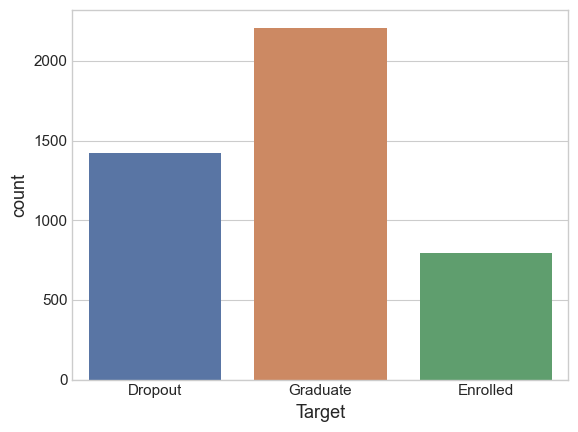

Graduate %: 0.4993218806509946
Dropout %: 0.3212025316455696
Enrolled %: 0.1794755877034358


In [89]:
sns.countplot(x='Target', hue='Target', data=eda, palette=palette, legend=False)
plt.show()

print('Graduate %:', (eda.Target == 'Graduate').sum() / len(eda))
print('Dropout %:', (eda.Target == 'Dropout').sum() / len(eda))
print('Enrolled %:', (eda.Target == 'Enrolled').sum() / len(eda))

**Graduate** is the dominating variable over **Dropout** and **Enrolled** with a 49% of the total students

As **Dropout** and **Enrolled** are significantly less represented than **Graduate**, this leads to `Class Imbalance` in the **Target** variable.

In order to handle that, further in the project this issue will be addressed to not perform poorly.

* `Marital status`:

| ID | Marital Status         |
|----|------------------------|
| 1  | Single                 |
| 2  | Married                |
| 3  | Widower                |
| 4  | Divorced               |
| 5  | Common-law marriage    |
| 6  | Legally separated      |

In [8]:
mat_labels = ['Single', 'Married', 'Widower', 'Divorced', 'Common-law marriage', 'Legally separated']
eda['Marital_labels'] = eda['Marital status'].map(lambda x: mat_labels[x - 1])


eda['Marital_labels'].value_counts()

Marital_labels
Single                 3919
Married                 379
Divorced                 91
Common-law marriage      25
Legally separated         6
Widower                   4
Name: count, dtype: int64

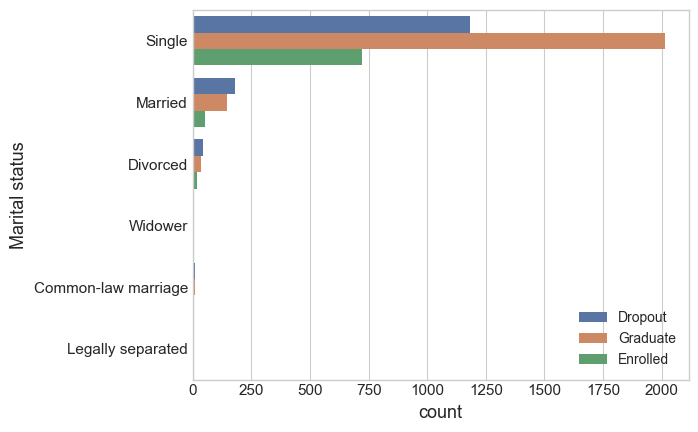

Single percentage: 0.8858499095840868
Married percentage: 0.08566907775768536
Divorced percentage: 0.020569620253164556


In [90]:
mat_labels = ['Single', 'Married', 'Widower', 'Divorced', 'Common-law marriage', 'Legally separated']
eda['Marital_labels'] = eda['Marital status'].map(lambda x: mat_labels[x - 1])

sns.countplot(y='Marital_labels', hue='Target', data=eda, palette=palette)
plt.ylabel('Marital status')
plt.legend(loc=4)
plt.show()

print('Single percentage:', (eda['Marital status'] == 1).sum() / len(eda))
print('Married percentage:', (eda['Marital status'] == 2).sum() / len(eda))
print('Divorced percentage:', (eda['Marital status'] == 4).sum() / len(eda))

The status of the students from the dataset is 88.5% **single**. It is interesting to note that **dropout** prevalence is higher in the other categories.

* `Application mode`:

| ID | Aplication Mode                                         |
|----|--------------------------------------------------------|
| 1  | 1st phase—general contingent                           |
| 2  | Ordinance No. 612/93                                   |
| 3  | 1st phase—special contingent (Azores Island)           |
| 4  | Holders of other higher courses                        |
| 5  | Ordinance No. 854-B/99                                |
| 6  | International student (bachelor)                       |
| 7  | 1st phase—special contingent (Madeira Island)          |
| 8  | 2nd phase—general contingent                           |
| 9  | 3rd phase—general contingent                           |
| 10 | Ordinance No. 533-A/99, item b2) (Different Plan)      |
| 11 | Ordinance No. 533-A/99, item b3 (Other Institution)    |
| 12 | Over 23 years old                                      |
| 13 | Transfer                                               |
| 14 | Change in course                                       |
| 15 | Technological specialization diploma holders           |
| 16 | Change in institution/course                           |
| 17 | Short cycle diploma holders                            |
| 18 | Change in institution/course (International)           |

In [10]:
application_mode_labels = [
    "1st phase—general contingent",
    "Ordinance No. 612/93",
    "1st phase—special contingent (Azores Island)",
    "Holders of other higher courses",
    "Ordinance No. 854-B/99",
    "International student (bachelor)",
    "1st phase—special contingent (Madeira Island)",
    "2nd phase—general contingent",
    "3rd phase—general contingent",
    "Ordinance No. 533-A/99, item b2) (Different Plan)",
    "Ordinance No. 533-A/99, item b3 (Other Institution)",
    "Over 23 years old",
    "Transfer",
    "Change in course",
    "Technological specialization diploma holders",
    "Change in institution/course",
    "Short cycle diploma holders",
    "Change in institution/course (International)"
]
eda['app_mode_labels'] = eda['Application mode'].map(lambda x: application_mode_labels[x - 1])

eda['app_mode_labels'].value_counts()

app_mode_labels
1st phase—general contingent                           1708
2nd phase—general contingent                            872
Over 23 years old                                       785
Change in course                                        312
Technological specialization diploma holders            213
Holders of other higher courses                         139
3rd phase—general contingent                            124
Transfer                                                 77
Change in institution/course                             59
1st phase—special contingent (Madeira Island)            38
Short cycle diploma holders                              35
International student (bachelor)                         30
1st phase—special contingent (Azores Island)             16
Ordinance No. 854-B/99                                   10
Ordinance No. 612/93                                      3
Change in institution/course (International)              1
Ordinance No. 533-A/99, 

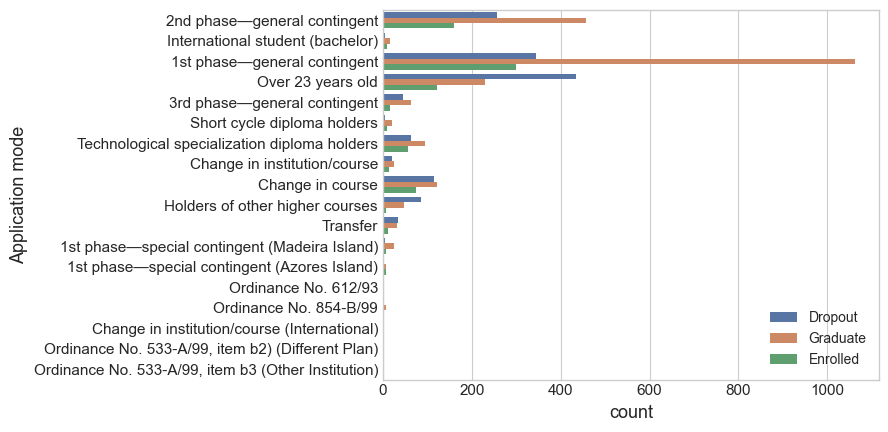

In [91]:

sns.countplot(y='app_mode_labels', hue='Target', data=eda, palette=palette)
plt.ylabel('Application mode')
plt.legend(loc=4)
plt.show()

Most of the students applicated trough general contingent. An interesting metric too is that most of the applicators over 23 year old are labelled as dropouts.

* `Application order`:

In [12]:
eda['Application order'].value_counts()

Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64

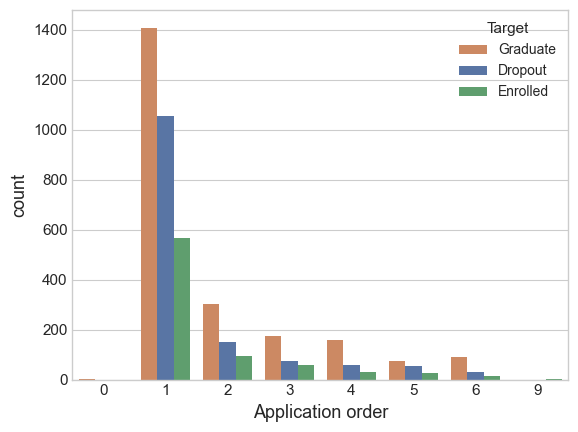

0.683996383363472


In [92]:
sns.countplot(x='Application order', hue='Target', data=eda, palette=palette)
plt.show()
print((eda['Application order'] == 1).sum() / len(eda))

Nothing interesting to note here, most students applicated first (68.4%) to the Polytechnic Institute of Portalegre. There's also a 0  that could mean an error on registering the information.

* `Course` :

| ID | Course                           |
|----|--------------------------------------|
| 1  | Biofuel Production Technologies      |
| 2  | Animation and Multimedia Design      |
| 3  | Social Service (evening attendance)  |
| 4  | Agronomy                            |
| 5  | Communication Design                 |
| 6  | Veterinary Nursing                   |
| 7  | Informatics Engineering              |
| 8  | Equiniculture                        |
| 9  | Management                           |
| 10 | Social Service                       |
| 11 | Tourism                              |
| 12 | Nursing                              |
| 13 | Oral Hygiene                         |
| 14 | Advertising and Marketing Management |
| 15 | Journalism and Communication         |
| 16 | Basic Education                      |
| 17 | Management (evening attendance)      |

In [14]:
course_labels = [
    "Biofuel Production Technologies",
    "Animation and Multimedia Design",
    "Social Service (evening attendance)",
    "Agronomy",
    "Communication Design",
    "Veterinary Nursing",
    "Informatics Engineering",
    "Equiniculture",
    "Management",
    "Social Service",
    "Tourism",
    "Nursing",
    "Oral Hygiene",
    "Advertising and Marketing Management",
    "Journalism and Communication",
    "Basic Education",
    "Management (evening attendance)"
]


eda['course_labels'] = eda['Course'].map(lambda x: course_labels[x - 1])
eda['course_labels'].value_counts()

course_labels
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Management (evening attendance)         268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equiniculture                           141
Oral Hygiene                             86
Biofuel Production Technologies          12
Name: count, dtype: int64

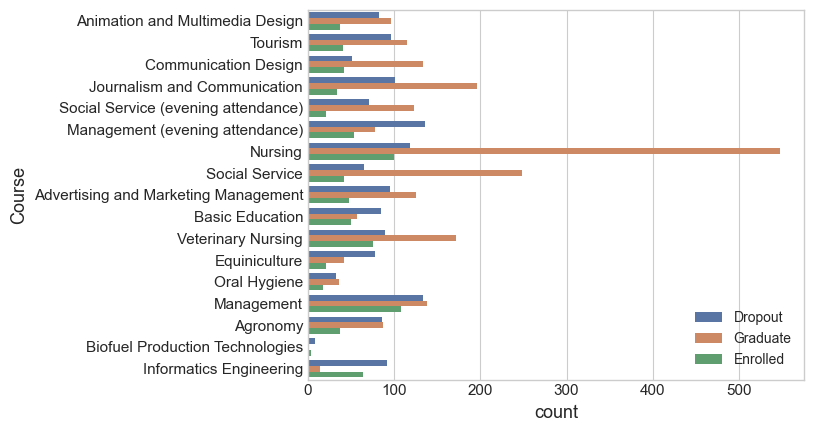

In [93]:

sns.countplot(y='course_labels', hue='Target', data=eda, palette=palette)
plt.ylabel('Course')
plt.legend(loc=4)
plt.show()

**Nursing** is by far the course with more graduates, then **social service**. **Management** despite being the second most popular course has an almost 50/50 ratio of graduates-dropouts. **Equiniculture**, **Informatics engineering** and **managment evening time** are the courses with most prevalence in dropouts.

* `Daytime/evening attendance`:

In [16]:
eda['Daytime/evening attendance'].value_counts()

Daytime/evening attendance
1    3941
0     483
Name: count, dtype: int64

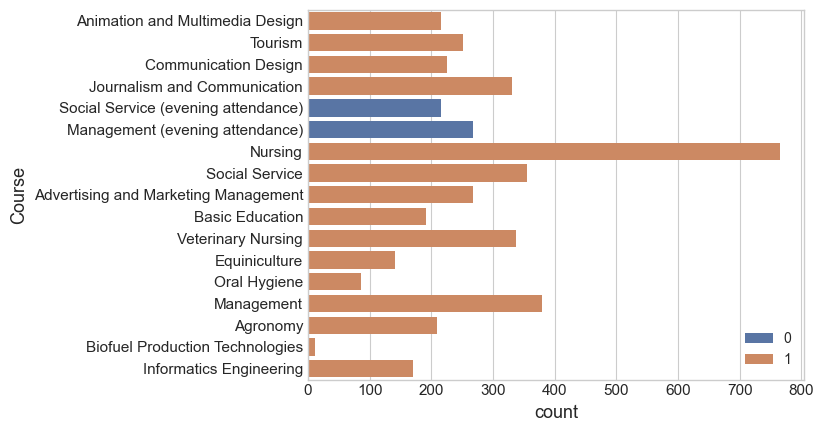

In [94]:
sns.countplot(y='course_labels', hue='Daytime/evening attendance', data=eda, palette='deep')
plt.ylabel('Course')
plt.legend(loc=4)
plt.show()

Only **social services** and **management** have an evening time option.

* `Previous qualification`:

| ID | Previous Qualification                                                     |
|----|---------------------------------------------------------------------------|
| 1  | Secondary education                                                       |
| 2  | Higher education—bachelor’s degree                                        |
| 3  | Higher education—degree                                                   |
| 4  | Higher education—master’s degree                                          |
| 5  | Higher education—doctorate                                                |
| 6  | Frequency of higher education                                             |
| 7  | 12th year of schooling—not completed                                      |
| 8  | 11th year of schooling—not completed                                      |
| 9  | Other—11th year of schooling                                              |
| 10 | 10th year of schooling                                                    |
| 11 | 10th year of schooling—not completed                                      |
| 12 | Basic education 3rd cycle (9th/10th/11th year) or equivalent              |
| 13 | Basic education 2nd cycle (6th/7th/8th year) or equivalent                |
| 14 | Technological specialization course                                       |
| 15 | Higher education—degree (1st cycle)                                       |
| 16 | Professional higher technical course                                      |
| 17 | Higher education—master’s degree (2nd cycle)                              |

In [18]:
previous_qual_labels = [
    "Secondary education",
    "Higher education—bachelor’s degree",
    "Higher education—degree",
    "Higher education—master’s degree",
    "Higher education—doctorate",
    "Frequency of higher education",
    "12th year of schooling—not completed",
    "11th year of schooling—not completed",
    "Other—11th year of schooling",
    "10th year of schooling",
    "10th year of schooling—not completed",
    "Basic education 3rd cycle (9th/10th/11th year) or equivalent",
    "Basic education 2nd cycle (6th/7th/8th year) or equivalent",
    "Technological specialization course",
    "Higher education—degree (1st cycle)",
    "Professional higher technical course",
    "Higher education—master’s degree (2nd cycle)"
]

eda['qual_labels'] = eda['Previous qualification'].map(lambda x: previous_qual_labels[x - 1])
eda['qual_labels'].value_counts()

qual_labels
Secondary education                                             3717
Technological specialization course                              219
Basic education 3rd cycle (9th/10th/11th year) or equivalent     162
Higher education—degree                                          126
Other—11th year of schooling                                      45
Higher education—degree (1st cycle)                               40
Professional higher technical course                              36
Higher education—bachelor’s degree                                23
Frequency of higher education                                     16
12th year of schooling—not completed                              11
Higher education—master’s degree                                   8
Basic education 2nd cycle (6th/7th/8th year) or equivalent         7
Higher education—master’s degree (2nd cycle)                       6
11th year of schooling—not completed                               4
10th year of schooling

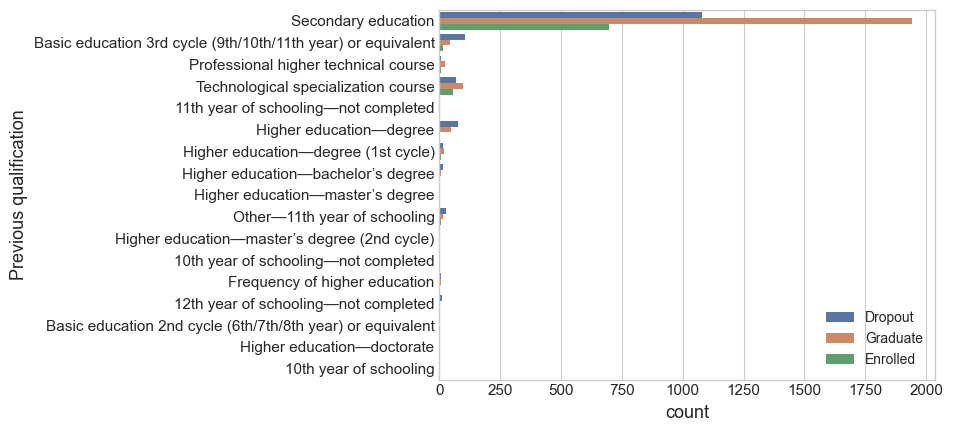

In [95]:
sns.countplot(y='qual_labels', hue='Target', data=eda, palette=palette)
plt.ylabel('Previous qualification')
plt.legend(loc=4)
plt.show()

Most of the students come from **Secondary education**, students that come from **Basic education 3rd cycle** have a bigger dropout rate than graduation rate.

* `Nationality`:

| ID | Language                |
|----|-------------------------|
| 1  | Portuguese              |
| 2  | German                  |
| 3  | Spanish                 |
| 4  | Italian                 |
| 5  | Dutch                   |
| 6  | English                 |
| 7  | Lithuanian              |
| 8  | Angolan                 |
| 9  | Cape Verdean            |
| 10 | Guinean                 |
| 11 | Mozambican              |
| 12 | Santomean               |
| 13 | Turkish                 |
| 14 | Brazilian               |
| 15 | Romanian                |
| 16 | Moldova (Republic of)   |
| 17 | Mexican                 |
| 18 | Ukrainian               |
| 19 | Russian                 |
| 20 | Cuban                   |
| 21 | Colombian               |

The `Nationality` feature is wrongly spelled (Nacionality instead of Nationality), that's why it is corrected below.

In [96]:
df = df.rename(columns={'Nacionality' : 'Nationality'})
eda = eda.rename(columns={'Nacionality' : 'Nationality'})

In [21]:
language_labels = [
    "Portuguese",
    "German",
    "Spanish",
    "Italian",
    "Dutch",
    "English",
    "Lithuanian",
    "Angolan",
    "Cape Verdean",
    "Guinean",
    "Mozambican",
    "Santomean",
    "Turkish",
    "Brazilian",
    "Romanian",
    "Moldova (Republic of)",
    "Mexican",
    "Ukrainian",
    "Russian",
    "Cuban",
    "Colombian"
]

eda['nat_labels'] = eda['Nationality'].map(lambda x: language_labels[x - 1])
eda['nat_labels'].value_counts()

nat_labels
Portuguese               4314
Brazilian                  38
Santomean                  14
Spanish                    13
Cape Verdean               13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Romanian                    2
Angolan                     2
Mexican                     2
Mozambican                  2
German                      2
Russian                     2
Turkish                     1
Dutch                       1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64

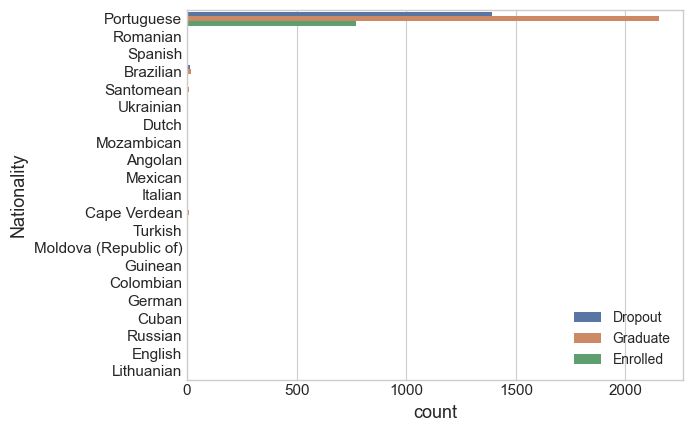

In [97]:
sns.countplot(y='nat_labels', hue='Target', data=eda, palette=palette)
plt.ylabel('Nationality')
plt.legend(loc=4)
plt.show()

The mayority of the students from the dataset are **Portuguese**.

* `Mother's qualification`

| ID | Parent Qualification                                                        |
|----|----------------------------------------------------------------------------|
| 1  | Secondary Education—12th Year of Schooling or Equivalent                   |
| 2  | Higher Education—bachelor’s degree                                         |
| 3  | Higher Education—degree                                                    |
| 4  | Higher Education—master’s degree                                           |
| 5  | Higher Education—doctorate                                                 |
| 6  | Frequency of Higher Education                                              |
| 7  | 12th Year of Schooling—not completed                                       |
| 8  | 11th Year of Schooling—not completed                                       |
| 9  | 7th Year (Old)                                                            |
| 10 | Other—11th Year of Schooling                                               |
| 11 | 2nd year complementary high school course                                  |
| 12 | 10th Year of Schooling                                                     |
| 13 | General commerce course                                                    |
| 14 | Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent               |
| 15 | Complementary High School Course                                           |
| 16 | Technical-professional course                                              |
| 17 | Complementary High School Course—not concluded                             |
| 18 | 7th year of schooling                                                      |
| 19 | 2nd cycle of the general high school course                                |
| 20 | 9th Year of Schooling—not completed                                        |
| 21 | 8th year of schooling                                                      |
| 22 | General Course of Administration and Commerce                              |
| 23 | Supplementary Accounting and Administration                                |
| 24 | Unknown                                                                   |
| 25 | Cannot read or write                                                       |
| 26 | Can read without having a 4th year of schooling                            |
| 27 | Basic education 1st cycle (4th/5th year) or equivalent                     |
| 28 | Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent                 |
| 29 | Technological specialization course                                        |
| 30 | Higher education—degree (1st cycle)                                        |
| 31 | Specialized higher studies course                                          |
| 32 | Professional higher technical course                                       |
| 33 | Higher Education—master’s degree (2nd cycle)                               |
| 34 | Higher Education—doctorate (3rd cycle)                                     |

In [23]:
parent_qual_labels = [
    "Secondary Education—12th Year of Schooling or Equivalent",
    "Higher Education—bachelor’s degree",
    "Higher Education—degree",
    "Higher Education—master’s degree",
    "Higher Education—doctorate",
    "Frequency of Higher Education",
    "12th Year of Schooling—not completed",
    "11th Year of Schooling—not completed",
    "7th Year (Old)",
    "Other—11th Year of Schooling",
    "2nd year complementary high school course",
    "10th Year of Schooling",
    "General commerce course",
    "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent",
    "Complementary High School Course",
    "Technical-professional course",
    "Complementary High School Course—not concluded",
    "7th year of schooling",
    "2nd cycle of the general high school course",
    "9th Year of Schooling—not completed",
    "8th year of schooling",
    "General Course of Administration and Commerce",
    "Supplementary Accounting and Administration",
    "Unknown",
    "Cannot read or write",
    "Can read without having a 4th year of schooling",
    "Basic education 1st cycle (4th/5th year) or equivalent",
    "Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent",
    "Technological specialization course",
    "Higher education—degree (1st cycle)",
    "Specialized higher studies course",
    "Professional higher technical course",
    "Higher Education—master’s degree (2nd cycle)",
    "Higher Education—doctorate (3rd cycle)"
]

eda['m_labels'] = eda['Mother\'s qualification'].map(lambda x: parent_qual_labels[x - 1])
eda['m_labels'].value_counts()


m_labels
Secondary Education—12th Year of Schooling or Equivalent        1069
General Course of Administration and Commerce                   1009
General commerce course                                          953
Supplementary Accounting and Administration                      562
Higher Education—degree                                          438
2nd cycle of the general high school course                      130
Higher Education—bachelor’s degree                                83
Higher Education—master’s degree                                  49
Other—11th Year of Schooling                                      42
Higher Education—doctorate                                        21
Cannot read or write                                               9
12th Year of Schooling—not completed                               8
Unknown                                                            8
Can read without having a 4th year of schooling                    6
Basic education 1st cycle

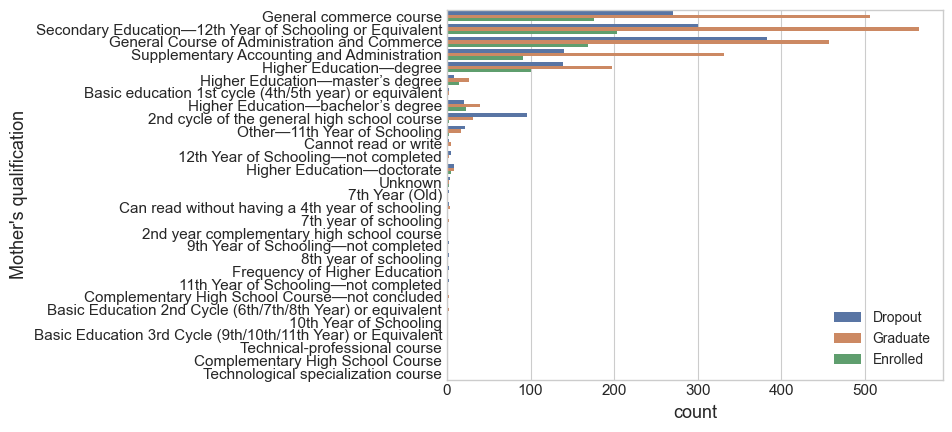

In [98]:
sns.countplot(y='m_labels', hue='Target', data=eda, palette=palette)
plt.ylabel('Mother\'s qualification')
plt.legend(loc=4)
plt.show()

As there's an elevated quantity of labels, the representation shows labels with **+10 entries**:

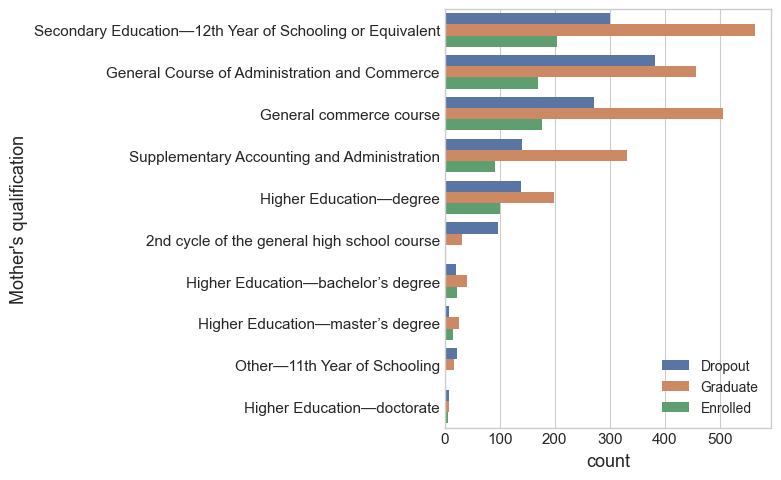

In [99]:
label_counts = eda['m_labels'].value_counts()
labels_to_keep = label_counts[label_counts >= 10].index
filtered_eda = eda[eda['m_labels'].isin(labels_to_keep)]

plt.figure(figsize=(8, 5))
sns.countplot(
    y='m_labels',
    hue='Target',
    data=filtered_eda,
    palette=palette,
    order=labels_to_keep  
)
plt.ylabel("Mother's qualification")
plt.legend(loc=4)
plt.tight_layout()
plt.show()

The majority of female progenitors have education in Secondary Education—12th Year of Schooling or Equivalent, General Course of Administration and Commerce and General commerce course.


* `Father's qualification`

Labels are the same as Mother's qualification.

In [26]:
eda['f_labels'] = eda['Father\'s qualification'].map(lambda x: parent_qual_labels[x - 1])
eda['f_labels'].value_counts()

f_labels
Basic education 1st cycle (4th/5th year) or equivalent          1209
Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent     968
Secondary Education—12th Year of Schooling or Equivalent         904
Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent       702
Higher Education—degree                                          282
Unknown                                                          112
Higher Education—bachelor’s degree                                68
Higher Education—master’s degree                                  39
Other—11th Year of Schooling                                      38
Technological specialization course                               20
Higher Education—doctorate                                        18
7th Year (Old)                                                    10
Can read without having a 4th year of schooling                    8
12th Year of Schooling—not completed                               5
Higher education—degree (

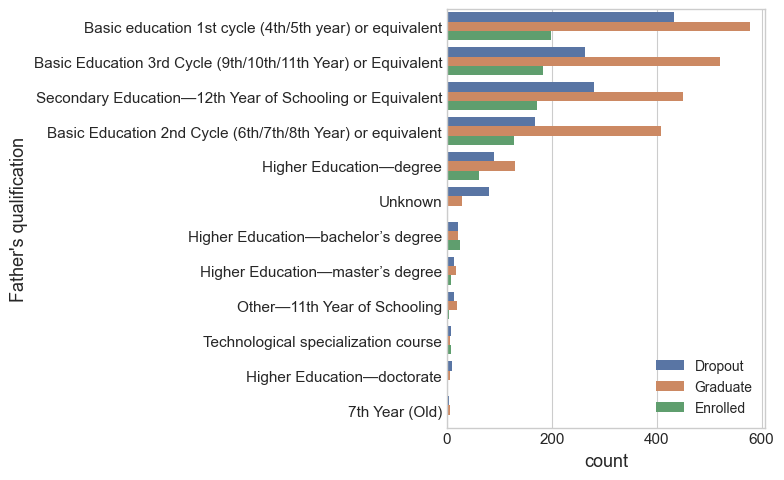

In [100]:
label_counts = eda['f_labels'].value_counts()
labels_to_keep = label_counts[label_counts >= 10].index
filtered_eda = eda[eda['f_labels'].isin(labels_to_keep)]

plt.figure(figsize=(8, 5))
sns.countplot(
    y='f_labels',
    hue='Target',
    data=filtered_eda,
    palette=palette,
    order=labels_to_keep  
)
plt.ylabel("Father's qualification")
plt.legend(loc=4)
plt.tight_layout()
plt.show()

The majority of male progenitors have education in Basic Education 1st cycle, Basic Education 3rd cycle, Secondary Education and Basic Education 2nd cycle.

* `Mother's Occupation`

| ID | Occupation                                                                                                                            |
|----|---------------------------------------------------------------------------------------------------------------------------------------|
| 1  | Student                                                                                                                              |
| 2  | Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers                           |
| 3  | Specialists in Intellectual and Scientific Activities                                                                                |
| 4  | Intermediate Level Technicians and Professions                                                                                       |
| 5  | Administrative staff                                                                                                                 |
| 6  | Personal Services, Security and Safety Workers, and Sellers                                                                          |
| 7  | Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry                                                                  |
| 8  | Skilled Workers in Industry, Construction, and Craftsmen                                                                             |
| 9  | Installation and Machine Operators and Assembly Workers                                                                              |
| 10 | Unskilled Workers                                                                                                                    |
| 11 | Armed Forces Professions                                                                                                             |
| 12 | Other Situation; 13—(blank)                                                                                                          |
| 13 | Armed Forces Officers                                                                                                                |
| 14 | Armed Forces Sergeants                                                                                                               |
| 15 | Other Armed Forces personnel                                                                                                         |
| 16 | Directors of administrative and commercial services                                                                                  |
| 17 | Hotel, catering, trade, and other services directors                                                                                 |
| 18 | Specialists in the physical sciences, mathematics, engineering, and related techniques                                               |
| 19 | Health professionals                                                                                                                 |
| 20 | Teachers                                                                                                                             |
| 21 | Specialists in finance, accounting, administrative organization, and public and commercial relations                                 |
| 22 | Intermediate level science and engineering technicians and professions                                                               |
| 23 | Technicians and professionals of intermediate level of health                                                                        |
| 24 | Intermediate level technicians from legal, social, sports, cultural, and similar services                                            |
| 25 | Information and communication technology technicians                                                                                 |
| 26 | Office workers, secretaries in general, and data processing operators                                                                |
| 27 | Data, accounting, statistical, financial services, and registry-related operators                                                    |
| 28 | Other administrative support staff                                                                                                   |
| 29 | Personal service workers                                                                                                             |
| 30 | Sellers                                                                                                                              |
| 31 | Personal care workers and the like                                                                                                   |
| 32 | Protection and security services personnel                                                                                           |
| 33 | Market-oriented farmers and skilled agricultural and animal production workers                                                       |
| 34 | Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence                                                       |
| 35 | Skilled construction workers and the like, except electricians                                                                       |
| 36 | Skilled workers in metallurgy, metalworking, and similar                                                                             |
| 37 | Skilled workers in electricity and electronics                                                                                       |
| 38 | Workers in food processing, woodworking, and clothing and other industries and crafts                                                |
| 39 | Fixed plant and machine operators                                                                                                    |
| 40 | Assembly workers                                                                                                                     |
| 41 | Vehicle drivers and mobile equipment operators                                                                                       |
| 42 | Unskilled workers in agriculture, animal production, and fisheries and forestry                                                      |
| 43 | Unskilled workers in extractive industry, construction, manufacturing, and transport                                                 |
| 44 | Meal preparation assistants                                                                                                          |
| 45 | Street vendors (except food) and street service provider                                                                             |

In [28]:
occupation_labels = [
    "Student",
    "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    "Specialists in Intellectual and Scientific Activities",
    "Intermediate Level Technicians and Professions",
    "Administrative staff",
    "Personal Services, Security and Safety Workers, and Sellers",
    "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
    "Skilled Workers in Industry, Construction, and Craftsmen",
    "Installation and Machine Operators and Assembly Workers",
    "Unskilled Workers",
    "Armed Forces Professions",
    "Other Situation; 13—(blank)",
    "Armed Forces Officers",
    "Armed Forces Sergeants",
    "Other Armed Forces personnel",
    "Directors of administrative and commercial services",
    "Hotel, catering, trade, and other services directors",
    "Specialists in the physical sciences, mathematics, engineering, and related techniques",
    "Health professionals",
    "Teachers",
    "Specialists in finance, accounting, administrative organization, and public and commercial relations",
    "Intermediate level science and engineering technicians and professions",
    "Technicians and professionals of intermediate level of health",
    "Intermediate level technicians from legal, social, sports, cultural, and similar services",
    "Information and communication technology technicians",
    "Office workers, secretaries in general, and data processing operators",
    "Data, accounting, statistical, financial services, and registry-related operators",
    "Other administrative support staff",
    "Personal service workers",
    "Sellers",
    "Personal care workers and the like",
    "Protection and security services personnel",
    "Market-oriented farmers and skilled agricultural and animal production workers",
    "Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence",
    "Skilled construction workers and the like, except electricians",
    "Skilled workers in metallurgy, metalworking, and similar",
    "Skilled workers in electricity and electronics",
    "Workers in food processing, woodworking, and clothing and other industries and crafts",
    "Fixed plant and machine operators",
    "Assembly workers",
    "Vehicle drivers and mobile equipment operators",
    "Unskilled workers in agriculture, animal production, and fisheries and forestry",
    "Unskilled workers in extractive industry, construction, manufacturing, and transport",
    "Meal preparation assistants",
    "Street vendors (except food) and street service provider"
]

eda['mo_labels'] = eda['Mother\'s occupation'].map(lambda x: occupation_labels[x - 1])
eda['mo_labels'].value_counts()

mo_labels
Unskilled Workers                                                                                             1577
Administrative staff                                                                                           817
Personal Services, Security and Safety Workers, and Sellers                                                    530
Intermediate Level Technicians and Professions                                                                 351
Specialists in Intellectual and Scientific Activities                                                          318
Skilled Workers in Industry, Construction, and Craftsmen                                                       272
Student                                                                                                        144
Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers     102
Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry   

To represent the Mother's occupation the same procedure is done, representing labels with +10 entries.

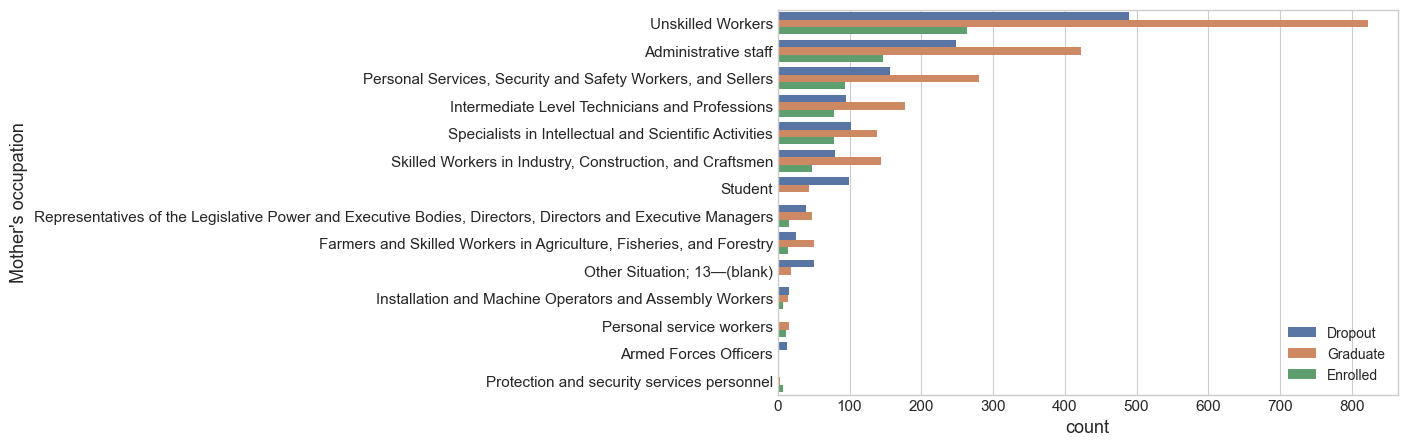

In [101]:
label_counts = eda['mo_labels'].value_counts()
labels_to_keep = label_counts[label_counts >= 10].index
filtered_eda = eda[eda['mo_labels'].isin(labels_to_keep)]

plt.figure(figsize=(8, 5))
sns.countplot(
    y='mo_labels',
    hue='Target',
    data=filtered_eda,
    palette=palette,
    order=labels_to_keep  
)
plt.ylabel("Mother's occupation")
plt.legend(loc=4)
plt.show()

Most female progenitors occupation are Unskilled Workers, Administrative staff and Personal Services, sellers and Security-Safe Workers.

There's a **prevalence in dropouts** of stutends whose mothers are also **studying.**

* `Father's Occupation`

Labels are the same as before, +10 entries are represented.

In [30]:
invalid = eda[~eda["Father's occupation"].between(1, len(occupation_labels))]
print(invalid["Father's occupation"].value_counts())

Father's occupation
46    1
Name: count, dtype: int64


There's an misslabeled entry for Father's Occupation (46 and there're only 45 labels). To deal with that a new label **Unknown** will be added.

In [31]:
foccupation_labels = [
    "Student",
    "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    "Specialists in Intellectual and Scientific Activities",
    "Intermediate Level Technicians and Professions",
    "Administrative staff",
    "Personal Services, Security and Safety Workers, and Sellers",
    "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
    "Skilled Workers in Industry, Construction, and Craftsmen",
    "Installation and Machine Operators and Assembly Workers",
    "Unskilled Workers",
    "Armed Forces Professions",
    "Other Situation; 13—(blank)",
    "Armed Forces Officers",
    "Armed Forces Sergeants",
    "Other Armed Forces personnel",
    "Directors of administrative and commercial services",
    "Hotel, catering, trade, and other services directors",
    "Specialists in the physical sciences, mathematics, engineering, and related techniques",
    "Health professionals",
    "Teachers",
    "Specialists in finance, accounting, administrative organization, and public and commercial relations",
    "Intermediate level science and engineering technicians and professions",
    "Technicians and professionals of intermediate level of health",
    "Intermediate level technicians from legal, social, sports, cultural, and similar services",
    "Information and communication technology technicians",
    "Office workers, secretaries in general, and data processing operators",
    "Data, accounting, statistical, financial services, and registry-related operators",
    "Other administrative support staff",
    "Personal service workers",
    "Sellers",
    "Personal care workers and the like",
    "Protection and security services personnel",
    "Market-oriented farmers and skilled agricultural and animal production workers",
    "Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence",
    "Skilled construction workers and the like, except electricians",
    "Skilled workers in metallurgy, metalworking, and similar",
    "Skilled workers in electricity and electronics",
    "Workers in food processing, woodworking, and clothing and other industries and crafts",
    "Fixed plant and machine operators",
    "Assembly workers",
    "Vehicle drivers and mobile equipment operators",
    "Unskilled workers in agriculture, animal production, and fisheries and forestry",
    "Unskilled workers in extractive industry, construction, manufacturing, and transport",
    "Meal preparation assistants",
    "Street vendors (except food) and street service provider",
    "Unknown"
]

eda['fo_labels'] = eda['Father\'s occupation'].map(lambda x: foccupation_labels[x - 1])
eda['fo_labels'].value_counts()

fo_labels
Unskilled Workers                                                                                             1010
Skilled Workers in Industry, Construction, and Craftsmen                                                       666
Personal Services, Security and Safety Workers, and Sellers                                                    516
Administrative staff                                                                                           386
Intermediate Level Technicians and Professions                                                                 384
Installation and Machine Operators and Assembly Workers                                                        318
Armed Forces Professions                                                                                       266
Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry                                            242
Specialists in Intellectual and Scientific Activities                 

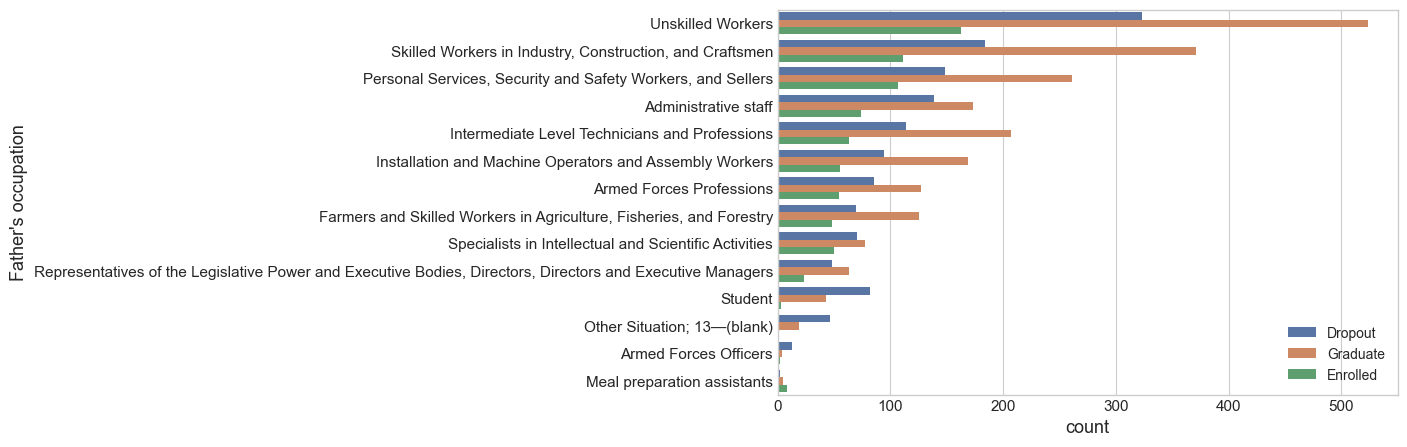

In [102]:
label_counts = eda['fo_labels'].value_counts()
labels_to_keep = label_counts[label_counts >= 10].index
filtered_eda = eda[eda['fo_labels'].isin(labels_to_keep)]

plt.figure(figsize=(8, 5))
sns.countplot(
    y='fo_labels',
    hue='Target',
    data=filtered_eda,
    palette=palette,
    order=labels_to_keep  
)
plt.ylabel("Father's occupation")
plt.legend(loc=4)
plt.show()

Similar to Mother's Occupation, prevalent occupations are Unskilled Workers, Personal Services, Sellers, Security-Safety Workers and the addition of occupation in Industry, Construction and Craftsmen.

**Dropouts** stand more with fathers that are also **studying.**

* `Displaced`

In [33]:
print(eda['Displaced'].value_counts())
print((eda.Displaced ==1).sum() / len(eda) * 100)

Displaced
1    2426
0    1998
Name: count, dtype: int64
54.8372513562387


**54.84%** of the students are considered **displaced.**

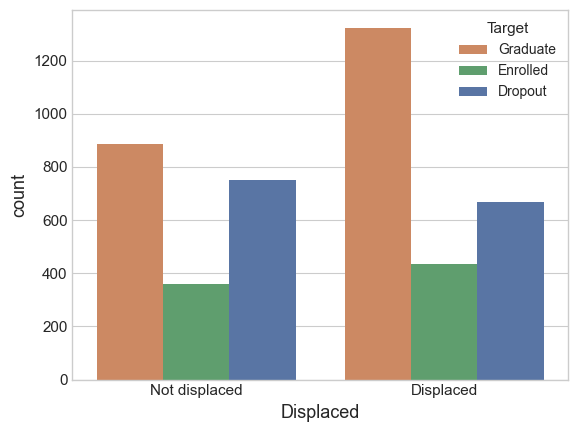

In [103]:
ax = plt.subplot()
sns.countplot(x='Displaced', hue='Target', data=eda, palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not displaced', 'Displaced'])
plt.show()

* `Educational Special Needs`

In [35]:
print(eda['Educational special needs'].value_counts())
print((eda['Educational special needs'] ==1).sum() / len(eda) * 100)

Educational special needs
0    4373
1      51
Name: count, dtype: int64
1.1528028933092225


Only **1.15%** of the students have **Educational Special needs.**

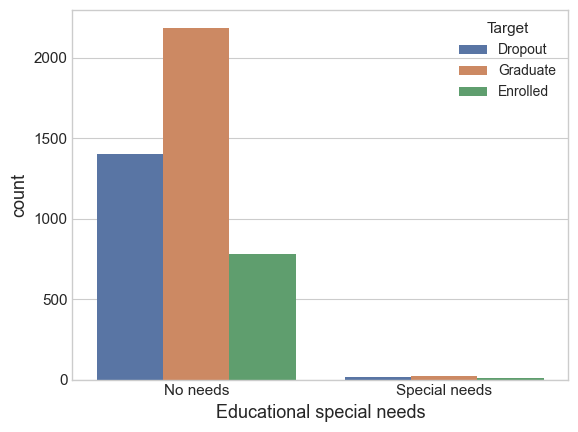

In [104]:
ax = plt.subplot()
sns.countplot(x='Educational special needs', hue='Target', data=eda, palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No needs', 'Special needs'])
plt.show()

* `Debtor`

In [37]:
print(eda['Debtor'].value_counts())
print((eda['Debtor'] ==1).sum() / len(eda) * 100)

Debtor
0    3921
1     503
Name: count, dtype: int64
11.369801084990959


11.37% of students are classified as debtors.

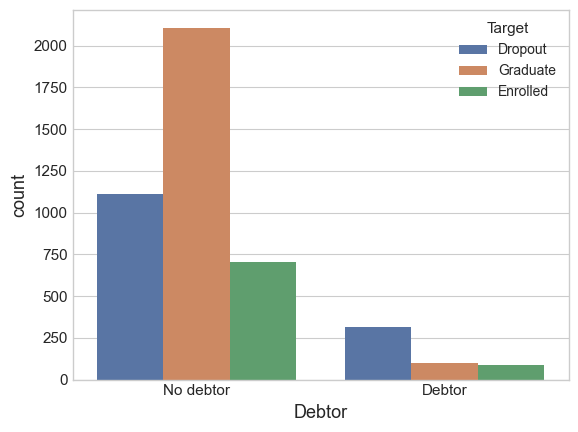

In [105]:
ax = plt.subplot()
sns.countplot(x='Debtor', hue='Target', data=eda, palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No debtor', 'Debtor'])
plt.show()

Most dropout students are classified as **debtors.**

* `Tuition Fees up to date`

In [39]:
print(eda['Tuition fees up to date'].value_counts())
print((eda['Tuition fees up to date'] ==1).sum() / len(eda) * 100)

Tuition fees up to date
1    3896
0     528
Name: count, dtype: int64
88.06509945750453


**88%** of the students have paid the tuition fees.

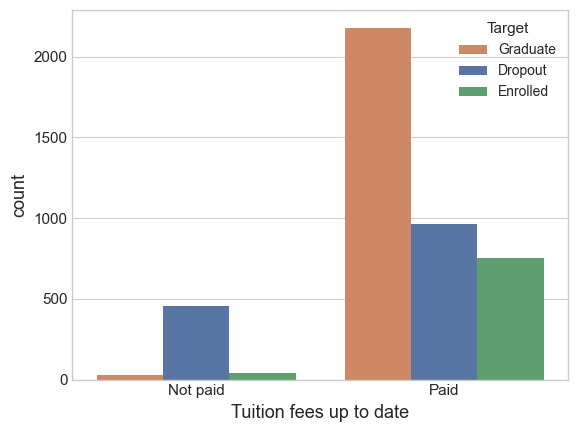

In [106]:
ax = plt.subplot()
sns.countplot(x='Tuition fees up to date', hue='Target', data=eda, palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not paid', 'Paid'])
plt.show()

Most of the students that didn't pay the **Tuition Fees** are classified as dropouts.

* `Gender`

In [41]:
print(eda['Gender'].value_counts())
print('Female\'s Percentage:')
print((eda['Gender'] ==1).sum() / len(eda) * 100)
print('Male\'s Percentage:')
print((eda['Gender'] ==0).sum() / len(eda) * 100)

Gender
0    2868
1    1556
Name: count, dtype: int64
Female's Percentage:
35.171790235081374
Male's Percentage:
64.82820976491863


The majority of the students from the dataset are **male (64.83 %)**, being **female 35.17%.**

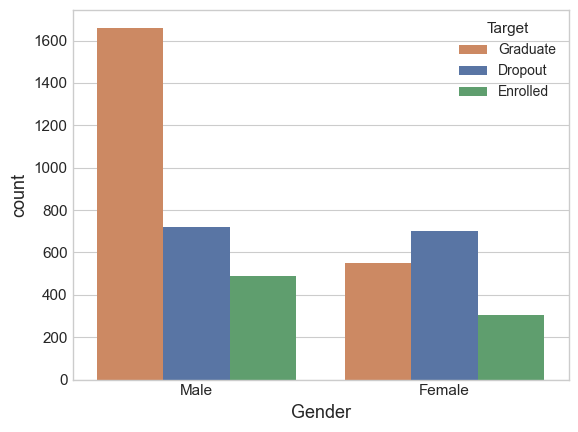

In [107]:
ax = plt.subplot()
sns.countplot(x='Gender', hue='Target', data=eda, palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'])
plt.show()

The majority of **female students** are classified as **dropouts.**

* `Scholarship holder`

In [43]:
print(eda['Scholarship holder'].value_counts())
print((eda['Scholarship holder'] ==1).sum() / len(eda) * 100)

Scholarship holder
0    3325
1    1099
Name: count, dtype: int64
24.841772151898734


24.84% of students receivied a scolarship.

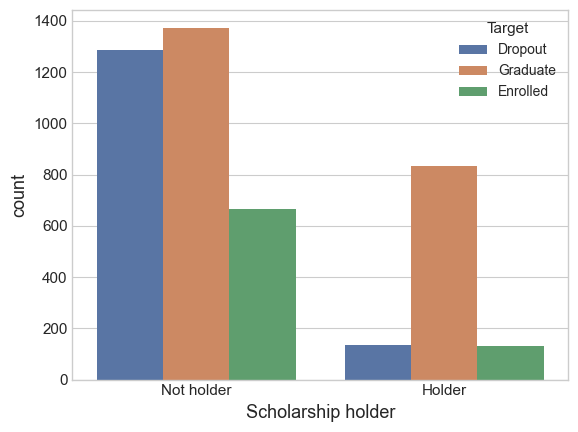

In [108]:
ax = plt.subplot()
sns.countplot(x='Scholarship holder', hue='Target', data=eda, palette=palette)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not holder', 'Holder'])
plt.show()

* `Age at enrollment`

In [45]:
print(eda['Age at enrollment'].value_counts())
print('Maximum age at enrollment:', eda['Age at enrollment'].max())


Age at enrollment
18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
35      49
30      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
42      13
49      13
46      12
48      11
51       7
54       7
53       7
55       5
17       5
52       4
58       3
59       3
60       2
57       2
70       1
61       1
62       1
Name: count, dtype: int64
Maximum age at enrollment: 70


Most frecuent enrollment ages go from 18-23. There's a high variety being the maximum age 70.

<Axes: xlabel='Age at enrollment', ylabel='count'>

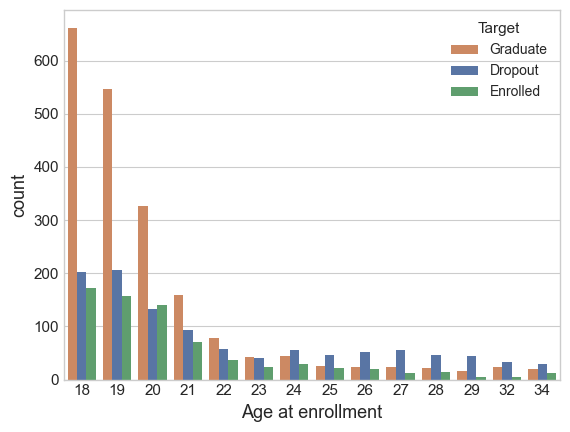

In [109]:
label_counts = eda['Age at enrollment'].value_counts()
labels_to_keep = label_counts[label_counts >= 60].index
filtered_eda = eda[eda['Age at enrollment'].isin(labels_to_keep)]
sns.countplot(x='Age at enrollment', hue='Target', data=filtered_eda, palette=palette)

The older the age at enrollment gets, dropout rate increases, surpasing the graduation rate, starting at 24 years old.

* `International`

In [47]:
print(eda['International'].value_counts())
print((eda['International'] ==1).sum() / len(eda) * 100)

International
0    4314
1     110
Name: count, dtype: int64
2.4864376130198913


Only 2.49% of the students are international students.

([<matplotlib.axis.XTick at 0x242a44c4190>],
 [Text(0, 0, 'International Students')])

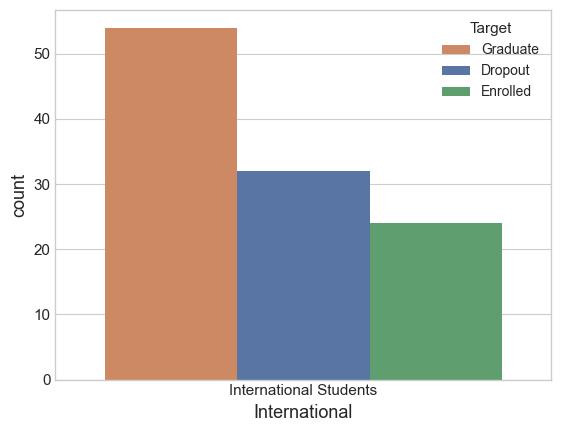

In [110]:

filtered_eda = eda[eda['International'] == 1]
sns.countplot(x='International', hue='Target', data=filtered_eda, palette=palette)
plt.xticks([0], ['International Students'])

* `Curricular units first sem (credited)`

In [49]:
eda['Curricular units 1st sem (credited)'].value_counts()

Curricular units 1st sem (credited)
0     3847
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
14      15
10      15
13      13
12      12
15       5
18       4
16       3
17       3
19       2
20       2
Name: count, dtype: int64

Most students do not have credited units. As this is the majority, it is represented the count of students that have at least 1 unit credited to analyze any possible trend in Graduate/Droptout.

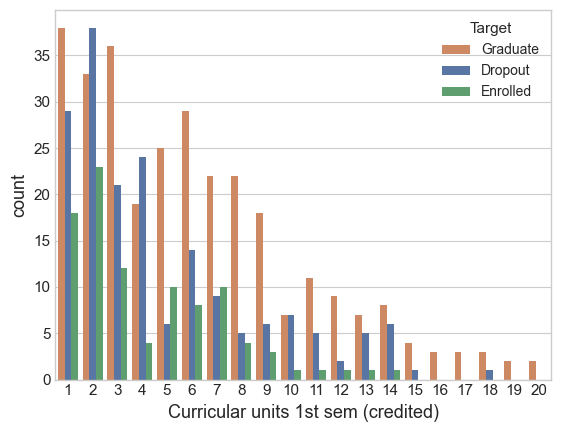

In [111]:
filtered_eda = eda[eda['Curricular units 1st sem (credited)'] >= 1]
sns.countplot(x='Curricular units 1st sem (credited)', hue='Target', data=filtered_eda, palette=palette)
plt.show()

Students that have 2 or 4 units credited tend to be Dropouts.

* `Curricular units first sem (enrolled)`

In [51]:
print(eda['Curricular units 1st sem (enrolled)'].value_counts())
print((eda['Curricular units 1st sem (enrolled)'] ==6).sum() / len(eda) * 100)
print((eda['Curricular units 1st sem (enrolled)'] ==5).sum() / len(eda) * 100)
print((eda['Curricular units 1st sem (enrolled)'] ==7).sum() / len(eda) * 100)

Curricular units 1st sem (enrolled)
6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: count, dtype: int64
43.173598553345386
22.83001808318264
14.828209764918626


**43.17%** of students enroll in 6 units in their first semester, followed by **22.83%** with 5 units enrolled and **14.83%** with 7 units enrolled.

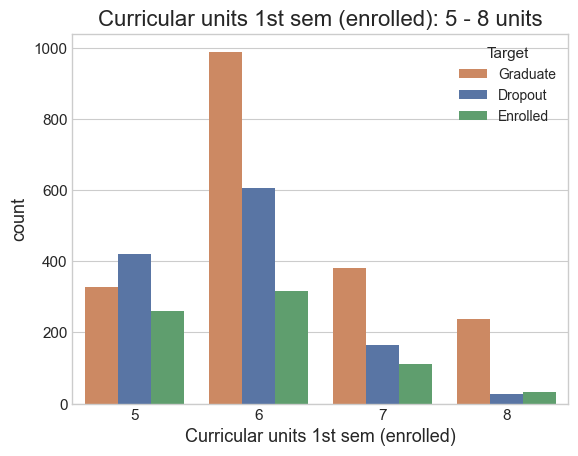

In [112]:
filtered_eda1 = eda[(eda['Curricular units 1st sem (enrolled)'] >= 5) & 
                    (eda['Curricular units 1st sem (enrolled)'] <= 8)]
sns.countplot(x='Curricular units 1st sem (enrolled)', hue='Target', data=filtered_eda1, palette=palette)
plt.title('Curricular units 1st sem (enrolled): 5 - 8 units')
plt.show()

The majority of students enroll from 5 to 8 units in the 1st semester. The dropout rate is above the graduate one only on students that enroll in 5 units.

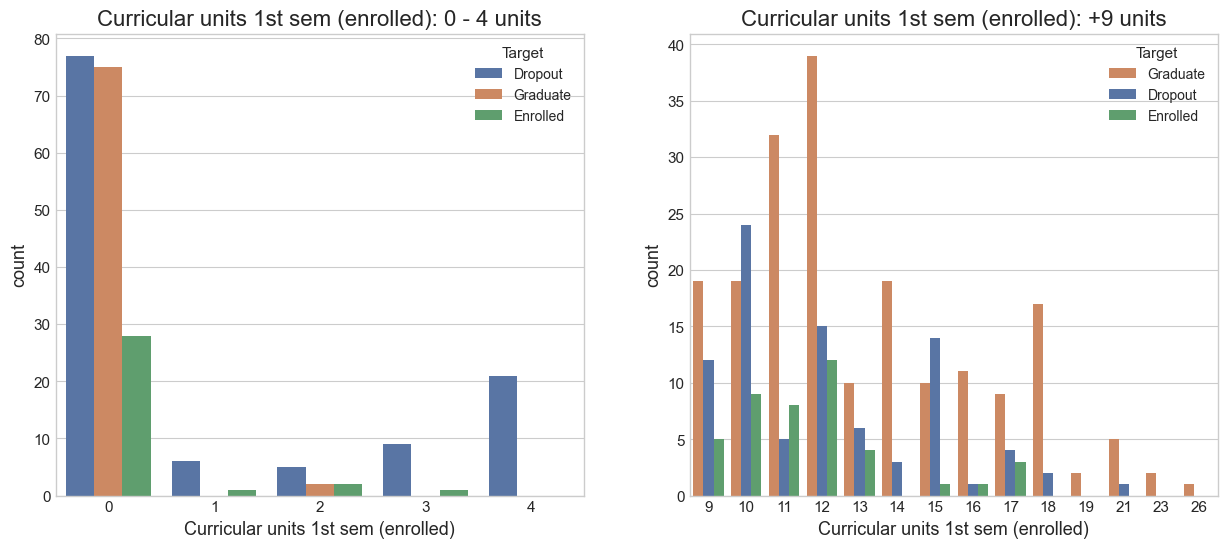

In [113]:
filtered_eda2 = eda[(eda['Curricular units 1st sem (enrolled)'] < 5)] 
filtered_eda3 = eda[(eda['Curricular units 1st sem (enrolled)'] > 8)] 

fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(x='Curricular units 1st sem (enrolled)', hue='Target', data=filtered_eda2, palette=palette)
plt.title('Curricular units 1st sem (enrolled): 0 - 4 units')

plt.subplot(1, 2, 2)
sns.countplot(x='Curricular units 1st sem (enrolled)', hue='Target', data=filtered_eda3, palette=palette)
plt.title('Curricular units 1st sem (enrolled): +9 units')
plt.show()

Students that enroll in **less than 5 units** tend to be dropouts.

Students that enroll in **more than 8 units** tend to graduate, only being the dropout rate superior in students enrolled in 10 adn 15 units.

* `Curricular units 1st sem (evaluations)`

In [54]:
print(eda['Curricular units 1st sem (evaluations)'].value_counts())
print(eda['Curricular units 1st sem (evaluations)'].nunique())
print((eda['Curricular units 1st sem (evaluations)'] ==8).sum() / len(eda) * 100)
print((eda['Curricular units 1st sem (evaluations)'] ==7).sum() / len(eda) * 100)


Curricular units 1st sem (evaluations)
8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
1       6
3       6
24      6
26      4
25      3
29      2
45      2
27      2
32      1
36      1
31      1
28      1
33      1
Name: count, dtype: int64
35
17.87974683544304
15.890596745027125


There's a high variety in the evaluations of the first semester's units (35). Major values are 8 units (17.88%) and 7 units (15.89%). 

The graphic representation includes values of +100 count of students.

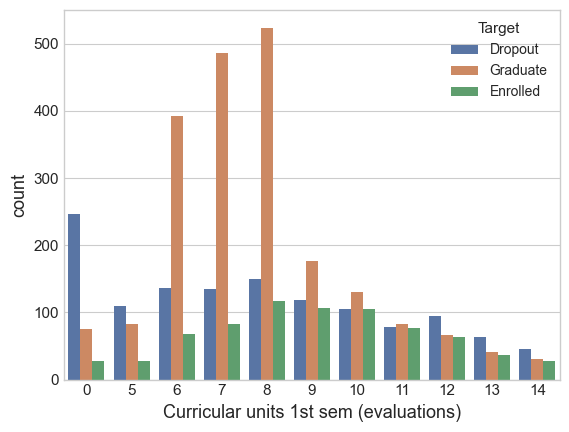

In [114]:
label_counts = eda['Curricular units 1st sem (evaluations)'].value_counts()
labels_to_keep = label_counts[label_counts >= 100].index
filtered_eda = eda[eda['Curricular units 1st sem (evaluations)'].isin(labels_to_keep)]
sns.countplot(x='Curricular units 1st sem (evaluations)', hue='Target', data=filtered_eda, palette=palette)
plt.show()

Most students with **0 units evaluated** are labelled as dropouts. That happens also with **+12 units evaluated**, however the disparity is way lower.

* `Curricular units first sem (approved)`

In [56]:
print(eda['Curricular units 1st sem (approved)'].value_counts())
print((eda['Curricular units 1st sem (approved)'] ==6).sum() / len(eda) * 100)
print((eda['Curricular units 1st sem (approved)'] ==0).sum() / len(eda) * 100)

Curricular units 1st sem (approved)
6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: count, dtype: int64
26.469258589511753
16.229656419529835


26.47% of the students **pass 6 units** in their first semester. 16.23% of the students **don't pass any unit at all**, being the 3rd highest percentage from all the students.

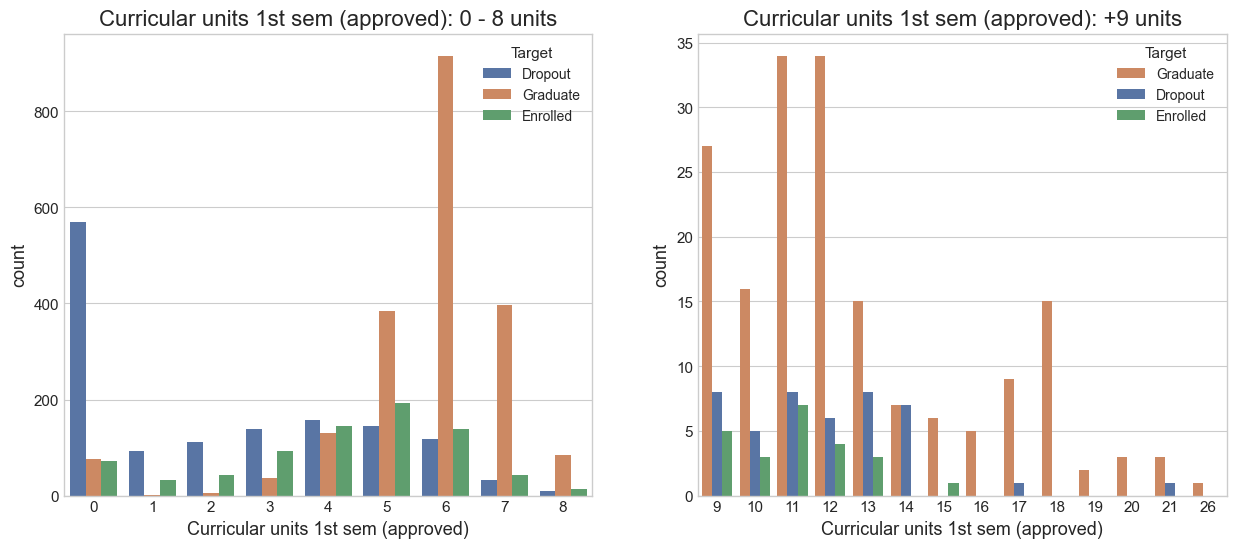

In [115]:
filtered_eda2 = eda[(eda['Curricular units 1st sem (approved)'] <= 8)] 
filtered_eda3 = eda[(eda['Curricular units 1st sem (approved)'] > 8)] 

fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(x='Curricular units 1st sem (approved)', hue='Target', data=filtered_eda2, palette=palette)
plt.title('Curricular units 1st sem (approved): 0 - 8 units')

plt.subplot(1, 2, 2)
sns.countplot(x='Curricular units 1st sem (approved)', hue='Target', data=filtered_eda3, palette=palette)
plt.title('Curricular units 1st sem (approved): +9 units')
plt.show()

Students that pass **less than 5 units** in the 1st semester tend to be the majority dropouts. On the other hand students that **pass +5** units tend to be graduates minus students that approve 14 units, that are 50/50 graduates - dropouts.

* `Curricular units 1st sem (without evaluations)`

In [58]:
print(eda['Curricular units 1st sem (without evaluations)'].value_counts())
print((eda['Curricular units 1st sem (without evaluations)'] ==0).sum() / len(eda) * 100)


Curricular units 1st sem (without evaluations)
0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: count, dtype: int64
93.35443037974683


93.35% of the students get all their units evaluated.

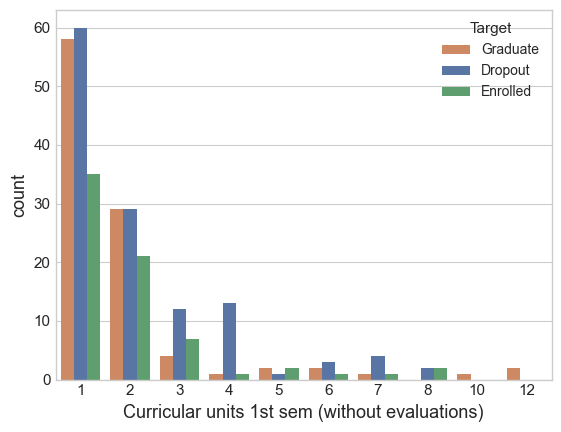

In [116]:
filtered_eda = eda[(eda['Curricular units 1st sem (without evaluations)'] >= 1)] 
sns.countplot(x='Curricular units 1st sem (without evaluations)', hue='Target', data=filtered_eda, palette=palette)
plt.show()

Most students that had a **unit or more not evaluated** were dropouts, only didn't students that had 2 units not evaluated (50/50 graduate - dropout) and 2 students that had 12 not evaluated.

* `Curricular units 2nd sem (credited)`

In [60]:
eda['Curricular units 2nd sem (credited)'].value_counts()

Curricular units 2nd sem (credited)
0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
15       2
16       2
18       2
19       1
Name: count, dtype: int64

Similar as the first semester, the majority of students don't have credited units alreade. The representation is done for students that have at least 1 unit credited.

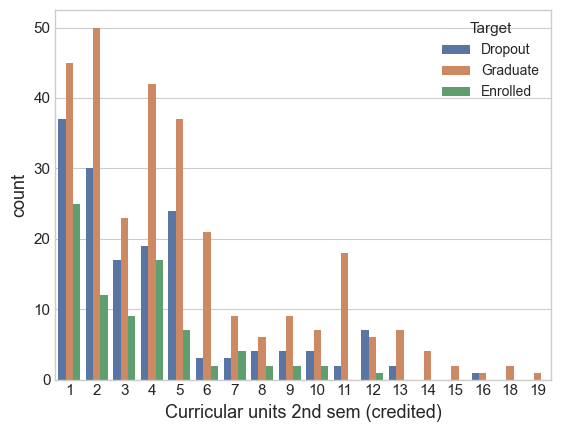

In [117]:
filtered_eda = eda[eda['Curricular units 2nd sem (credited)'] >= 1]
sns.countplot(x='Curricular units 2nd sem (credited)', hue='Target', data=filtered_eda, palette=palette)
plt.show()

Students that have 12 units credited in the second semester are the majority labelled as dropouts.

* `Curricular units 2nd semester (enrolled)`

In [62]:
print(eda['Curricular units 2nd sem (enrolled)'].value_counts())
print((eda['Curricular units 2nd sem (enrolled)'] ==6).sum() / len(eda) * 100)
print((eda['Curricular units 2nd sem (enrolled)'] ==5).sum() / len(eda) * 100)

Curricular units 2nd sem (enrolled)
6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
3        3
19       3
1        3
15       2
23       2
18       2
16       1
21       1
Name: count, dtype: int64
43.24141048824593
23.824593128390596


**43.24%** of students enroll in 6 units in their first semester, followed by **23.82%** with 5 units enrolled. This is similar to the behaviour of the first semester.

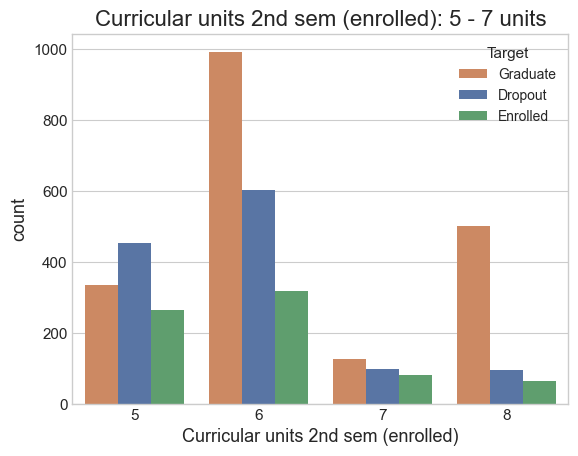

In [118]:
filtered_eda1 = eda[(eda['Curricular units 2nd sem (enrolled)'] >= 5) & 
                    (eda['Curricular units 2nd sem (enrolled)'] <= 8)]
sns.countplot(x='Curricular units 2nd sem (enrolled)', hue='Target', data=filtered_eda1, palette=palette)
plt.title('Curricular units 2nd sem (enrolled): 5 - 7 units')
plt.show()

The majority of students enroll from 5 to 7 units in the 1st semester. The dropout rate is above the graduate one only on students that enroll in 5 units (same tendency as the first semester).

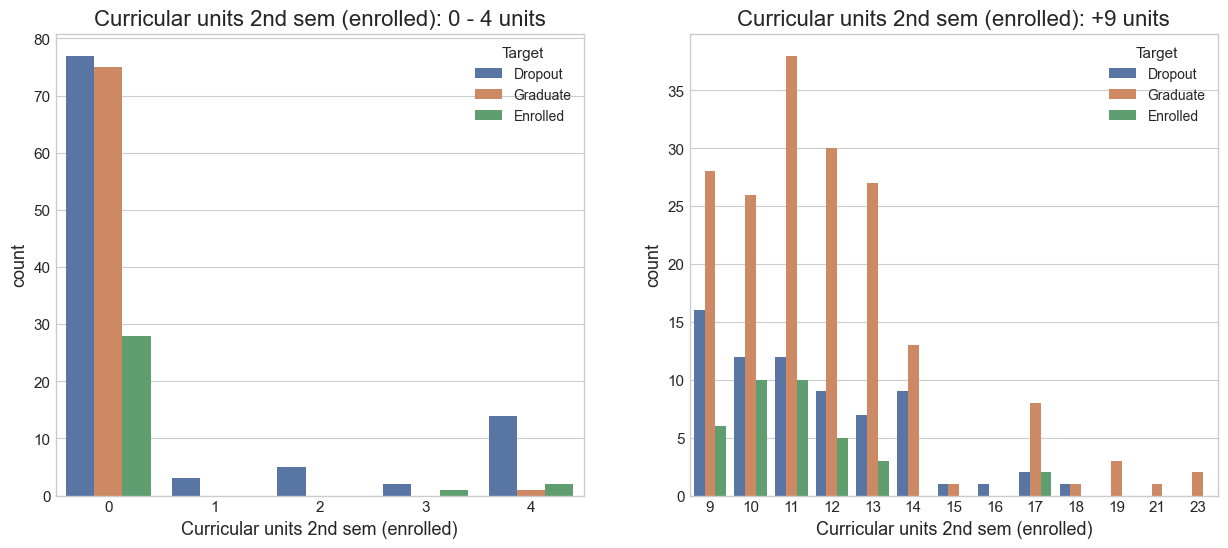

In [119]:
filtered_eda2 = eda[(eda['Curricular units 2nd sem (enrolled)'] < 5)] 
filtered_eda3 = eda[(eda['Curricular units 2nd sem (enrolled)'] > 8)] 

fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(x='Curricular units 2nd sem (enrolled)', hue='Target', data=filtered_eda2, palette=palette)
plt.title('Curricular units 2nd sem (enrolled): 0 - 4 units')

plt.subplot(1, 2, 2)
sns.countplot(x='Curricular units 2nd sem (enrolled)', hue='Target', data=filtered_eda3, palette=palette)
plt.title('Curricular units 2nd sem (enrolled): +9 units')
plt.show()

Students that enroll in **less than 5 units** tend to be dropouts. The dropout range is similar to the first semester in this range.

Students that enroll in **more than 8 units** tend to graduate, only being the dropout rate superior in students enrolled in 16 units. The dropout rate is inferior to the first semester in this range.

* `Curricular units 2nd semester (evaluations)`

In [65]:
print(eda['Curricular units 2nd sem (evaluations)'].value_counts())
print((eda['Curricular units 2nd sem (evaluations)'] ==8).sum() / len(eda) * 100)
print((eda['Curricular units 2nd sem (evaluations)'] ==6).sum() / len(eda) * 100)

Curricular units 2nd sem (evaluations)
8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
21     10
4      10
22     10
20      8
23      4
2       4
26      3
1       3
24      3
3       2
27      2
28      1
25      1
33      1
Name: count, dtype: int64
17.90235081374322
13.87884267631103


Same as first semester, there's a high variety in the units evaluated. Major values are **8 units (17.9%)** and **6 units (13.88%).** 

The graphic representation includes values of +100 count of students.

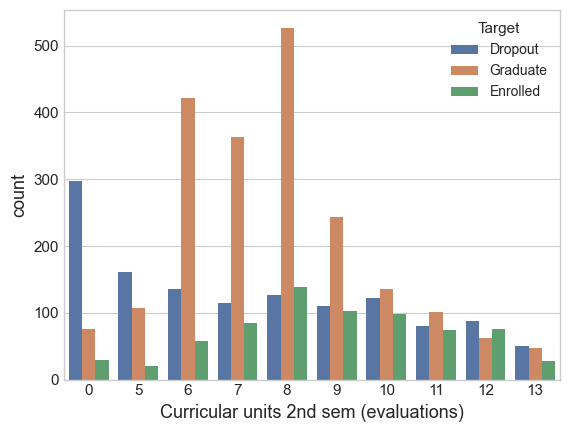

In [120]:
label_counts = eda['Curricular units 2nd sem (evaluations)'].value_counts()
labels_to_keep = label_counts[label_counts >= 100].index
filtered_eda = eda[eda['Curricular units 2nd sem (evaluations)'].isin(labels_to_keep)]
sns.countplot(x='Curricular units 2nd sem (evaluations)', hue='Target', data=filtered_eda, palette=palette)
plt.show()

Most students with **0, 5 units evaluated** are labelled as dropouts. That happens also with **+12 units evaluated**, however the disparity is way lower. The trend is similar as the first semester.

* `Curricular units 2nd semester (approved)`

In [67]:
print(eda['Curricular units 2nd sem (approved)'].value_counts())
print((eda['Curricular units 2nd sem (approved)'] ==6).sum() / len(eda) * 100)
print((eda['Curricular units 2nd sem (approved)'] ==0).sum() / len(eda) * 100)

Curricular units 2nd sem (approved)
6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
20      2
16      2
18      2
Name: count, dtype: int64
21.812839059674502
19.665461121157325


21.81% of the students **pass 6 units** in their first semester, lower percentage as first semester. 19.67% of the students **don't pass any unit at all**, being the 2nd highest percentage from all the students, and higher compared to the percentage of students that didn't pass any unit in the first semester.

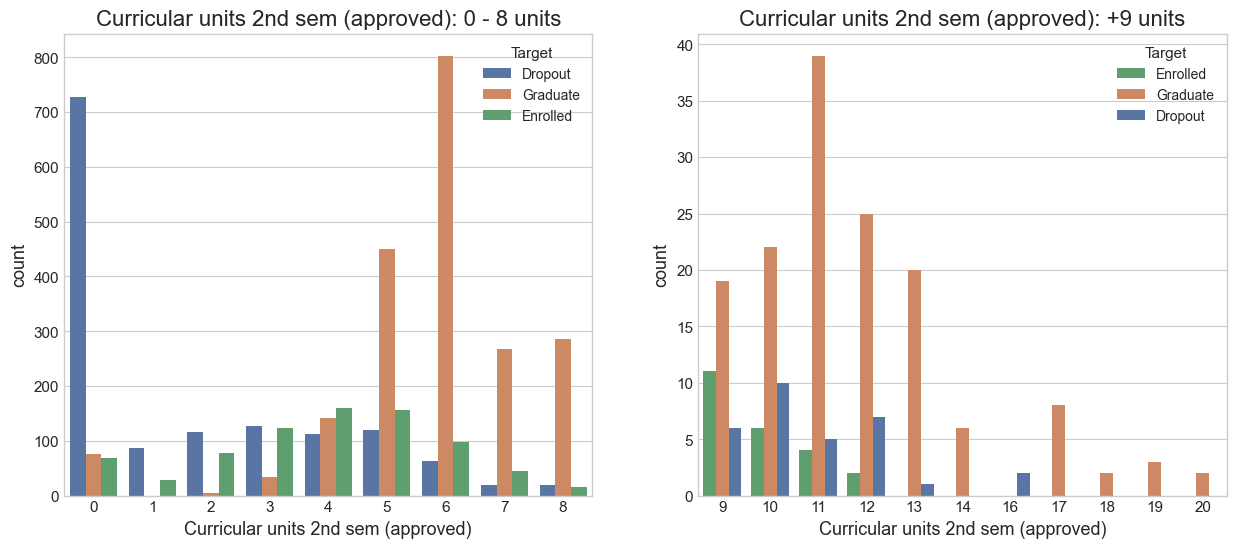

In [121]:
filtered_eda2 = eda[(eda['Curricular units 2nd sem (approved)'] <= 8)] 
filtered_eda3 = eda[(eda['Curricular units 2nd sem (approved)'] > 8)] 

fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(x='Curricular units 2nd sem (approved)', hue='Target', data=filtered_eda2, palette=palette)
plt.title('Curricular units 2nd sem (approved): 0 - 8 units')

plt.subplot(1, 2, 2)
sns.countplot(x='Curricular units 2nd sem (approved)', hue='Target', data=filtered_eda3, palette=palette)
plt.title('Curricular units 2nd sem (approved): +9 units')
plt.show()

Students that pass **less than 4 units** in the 2nd semester tend to be the majority dropouts. On the other hand students that **pass +5** units tend to be graduates minus students that approve 16 units, that are only dropouts (just 2 students).

* `Curricular units 2nd semester (without evaluations)`

In [69]:
print(eda['Curricular units 2nd sem (without evaluations)'].value_counts())
print((eda['Curricular units 2nd sem (without evaluations)'] ==0).sum() / len(eda) * 100)

Curricular units 2nd sem (without evaluations)
0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: count, dtype: int64
93.625678119349


93.63% of the students get all their units evaluated, slighty higher percentage than first semester.

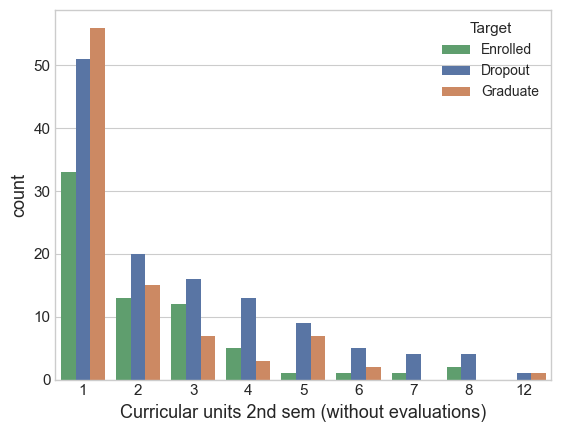

In [122]:
filtered_eda = eda[(eda['Curricular units 2nd sem (without evaluations)'] >= 1)] 
sns.countplot(x='Curricular units 2nd sem (without evaluations)', hue='Target', data=filtered_eda, palette=palette)
plt.show()

Most students that had a **two units or more not evaluated** were dropouts, only didn't students that had 12 units not evaluated (50/50 graduate - dropout).

* `Unemployment rate`

In [71]:
print(eda['Unemployment rate'].describe())
print('-------------------------------------')
print(eda['Unemployment rate'].value_counts())
print('-------------------------------------')
print(eda['Unemployment rate'].info())
print(eda['Unemployment rate'].nunique())

count    4424.000000
mean       11.566139
std         2.663850
min         7.600000
25%         9.400000
50%        11.100000
75%        13.900000
max        16.200000
Name: Unemployment rate, dtype: float64
-------------------------------------
Unemployment rate
7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: count, dtype: int64
-------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 4424 entries, 0 to 4423
Series name: Unemployment rate
Non-Null Count  Dtype  
--------------  -----  
4424 non-null   float64
dtypes: float64(1)
memory usage: 34.7 KB
None
10


The unemployment rate consists in 10 floating numbers varying from 7.6 to 16.2, probably the recorded unemployment rate for the periods of acceptance for new students, consisting in 10 periods according to the 10 different values of unemployment rate.

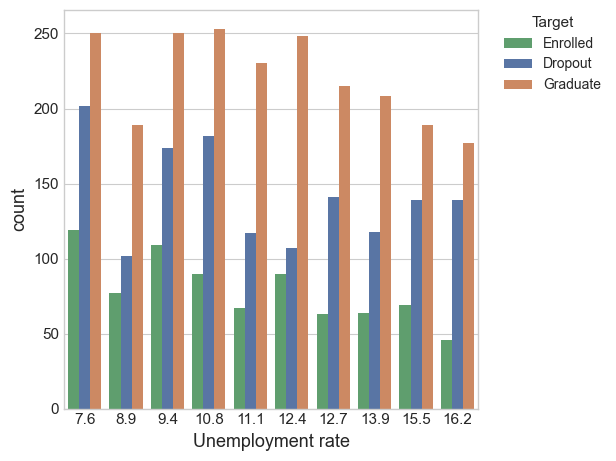

In [123]:
sns.countplot(x='Unemployment rate', hue='Target', data=eda, palette=palette)
plt.legend(title="Target", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

* `Inflation rate`

In [73]:
print(eda['Inflation rate'].describe())
print('-------------------------------------')
print(eda['Inflation rate'].value_counts())
print('-------------------------------------')
print(eda['Inflation rate'].info())
print(eda['Inflation rate'].nunique())

count    4424.000000
mean        1.228029
std         1.382711
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: Inflation rate, dtype: float64
-------------------------------------
Inflation rate
 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: count, dtype: int64
-------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 4424 entries, 0 to 4423
Series name: Inflation rate
Non-Null Count  Dtype  
--------------  -----  
4424 non-null   float64
dtypes: float64(1)
memory usage: 34.7 KB
None
9


The inflation rate consists in 9 floating numbers varying from -0.8 to 3.7. Same as with the unemployment rate, it would be the recorded rate at the period of the student's enrollment, in this case there're 9 unique values compared to the unemployment rate of 10. This could mean that there were two periods of enrollment with the exact same inflation rate, probably for the **1.4** value, which count is almost double as the second higher count value. 

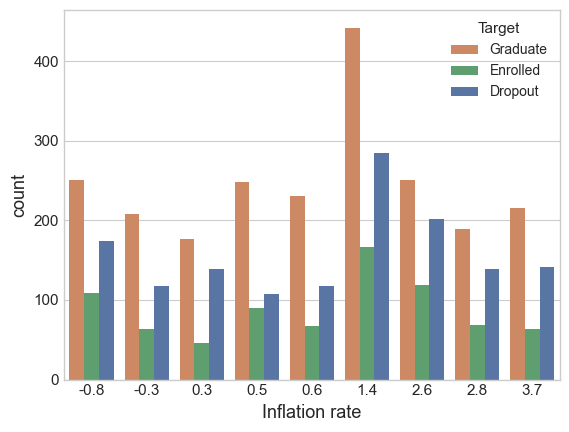

In [124]:
sns.countplot(x='Inflation rate', hue='Target', data=eda, palette=palette)
plt.show()

* `GDP`

In [75]:
print(eda['GDP'].describe())
print('-------------------------------------')
print(eda['GDP'].value_counts())
print('-------------------------------------')
print(eda['GDP'].info())
print(eda['GDP'].nunique())

count    4424.000000
mean        0.001969
std         2.269935
min        -4.060000
25%        -1.700000
50%         0.320000
75%         1.790000
max         3.510000
Name: GDP, dtype: float64
-------------------------------------
GDP
 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: count, dtype: int64
-------------------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 4424 entries, 0 to 4423
Series name: GDP
Non-Null Count  Dtype  
--------------  -----  
4424 non-null   float64
dtypes: float64(1)
memory usage: 34.7 KB
None
10


GDP variable behaves in a similar way of Inflation/Unemployment rate, with 10 different rates probably recorded at the period of the student's enrollment.

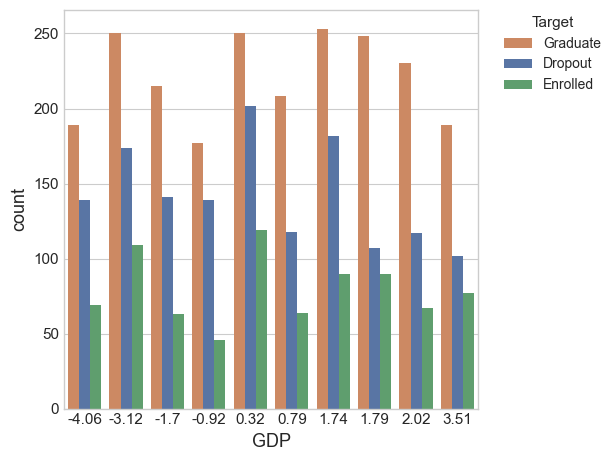

In [125]:
sns.countplot(x='GDP', hue='Target', data=eda, palette=palette)
plt.legend(title="Target", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

## Analysis Summary:
### Target Variable (Graduate, Dropout, Enrolled)
- **Distribution:** 
  - Graduate: 49.9%
  - Dropout: 32.1%
  - Enrolled: 17.9%
- **Implication:** The dataset is imbalanced, with Graduates being the majority. Special attention is needed for model training to address this imbalance.

---

### Key Demographics & Social Factors

- **Marital Status**

  - **Majority Single:** 88.6% of students are single.

  - **Dropout Tendency:** Dropouts are more prevalent in non-single categories.

* **Gender**

  - **Male Dominance:** 64.8% male, 35.2% female.

  - **Dropout Pattern:** Female students exhibit a higher dropout rate than males.

* **Age at Enrollment**

  - **Typical Age:** Most enrollments occur between 18-23 years.

  - **Dropout Risk:** Dropout rates rise significantly for students enrolling at 24+ years.

* **Nationality**

  - **Predominantly Portuguese:** 97.5% Portuguese, very few international students (2.5%).

---

### Academic Pathways & Performance

* **Application/Entry**

  - **First Choice:** 68.4% of students applied as their first choice.

  - **Over 23 Years Old:** This group shows a higher dropout rate.

* **Course**

  - **Top Courses:** Nursing, Management, and Social Service have the most students.

  - **High Dropout:** Equiniculture, Informatics Engineering, and Management (evening) show elevated dropout rates.

* **Previous Qualifications**

  - **Most from Secondary Education:** Students with only basic education (3rd cycle) have higher dropout rates.

---

### Family Background

* **Parental Education**

  - **Mother:** Most have secondary education or commerce-related qualifications.

  - **Father:** Most have basic education (1st or 3rd cycle).

* **Parental Occupation**

  - **Mother:** Most common occupations are Unskilled Workers, Administrative Staff, and Personal Services/Sellers.

  - **Father:** Similar, with the addition of Skilled Industry/Construction. Dropouts are more frequent when parents are also students.

---

### Socioeconomic Factors

* **Displaced Students**

  - **54.8% Displaced:** These students live away from home for their studies.

* **Debtor & Tuition**

  - **Debtors:** 11.4% of students are debtors, with a higher dropout rate among them.

  - **Tuition Paid:** 88% are up-to-date; non-payment is strongly linked to dropping out.

* **Scholarships**

  - **24.8% Scholarship Holders:** Fairly distributed, but not strongly linked to dropout/graduation.

---

### Special Needs & Other

* **Educational Special Needs**

  - **Rare (1.15%):** Very few students have recorded special needs.

---

### Academic Progress (Curricular Units)

* **1st & 2nd Semester Patterns**

  - **Enrolled Units:** Most students enroll in 5-8 units per semester.

  - **Approved Units:** Graduates typically pass 6+ units per semester; dropouts often pass fewer than 5.

  - **Units Not Evaluated:** Students with unevaluated units are more likely to drop out.

---

### Macroeconomic Context

* **Unemployment, Inflation, GDP**

  - **Recorded at Enrollment:** These variables have a small set of possible values.

  - **No Strong Trends:** Not directly linked to dropout/graduate status in univariate view, but may matter in multivariate analysis.

---

### Summary Table

| Variable                     | Main Finding                                         | Dropout Risk?         |
|------------------------------|-----------------------------------------------------|-----------------------|
| Target                       | Imbalanced (Graduates dominate)                     | Yes                   |
| Gender                       | More males; higher dropout for females              | Yes                   |
| Age at Enrollment            | 18-23 typical; 24+ riskier                         | Yes                   |
| Marital Status               | Most single; non-single higher dropout              | Yes                   |
| Application Mode             | Over 23, transfers, special entries riskier         | Yes                   |
| Course                       | Some courses high dropout/graduate split            | Yes                   |
| Previous/Parental Education  | Low education backgrounds riskier                   | Yes                   |
| Parental Occupation          | Unskilled/Student occupations riskier               | Yes                   |
| Displaced                    | 54.8% displaced                                     | Neutral               |
| Debtor/Tuition Paid          | Debt/non-payment linked to dropout                  | Yes                   |
| Scholarship                  | 24.8% receive; no clear link to dropout             | No                    |
| Special Needs                | Very rare                                           | Neutral               |
| Academic Progress            | Low approvals/enrollments linked to dropout         | Yes                   |
| Macro Variables              | No clear univariate trend                           | No                    |

### 2.2. Correlation

To ensure a correct work for classification models, the no multicollinearity assumption needs to be fullfilled. That can be checked by a correlation analysis.

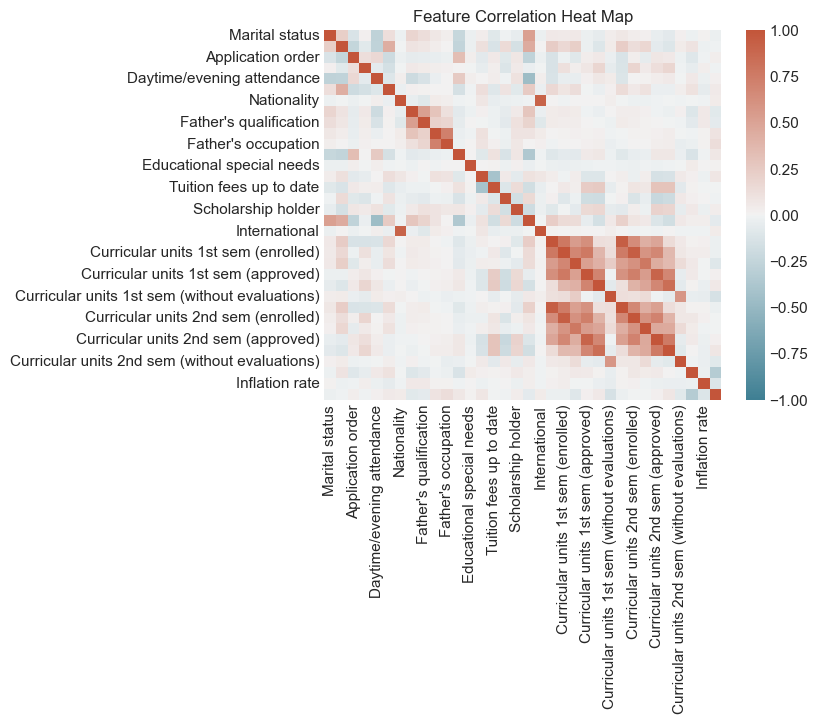

In [126]:
data_matrix = df.drop(['Target'], axis=1)
classes = df['Target']

corr_matrix = data_matrix.corr()
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_matrix, vmin= -1, vmax= 1, cmap=red_blue)
plt.title('Feature Correlation Heat Map', fontsize= 12)
plt.show()


In [78]:
# Generate a list of highly correlated pair of features and their correlation value

threshold = 0.7

corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)
# Filter by threshold
real_corr = corr_pairs[corr_pairs > threshold]
print(real_corr)

Curricular units 1st sem (credited)     Curricular units 2nd sem (credited)       0.944811
Curricular units 1st sem (enrolled)     Curricular units 2nd sem (enrolled)       0.942627
Nationality                             International                             0.911724
Curricular units 1st sem (approved)     Curricular units 2nd sem (approved)       0.904002
Curricular units 1st sem (grade)        Curricular units 2nd sem (grade)          0.837170
Curricular units 1st sem (evaluations)  Curricular units 2nd sem (evaluations)    0.778863
Curricular units 1st sem (credited)     Curricular units 1st sem (enrolled)       0.774344
Curricular units 1st sem (enrolled)     Curricular units 1st sem (approved)       0.769083
Curricular units 2nd sem (approved)     Curricular units 2nd sem (grade)          0.760804
Curricular units 1st sem (enrolled)     Curricular units 2nd sem (credited)       0.753747
Curricular units 1st sem (approved)     Curricular units 2nd sem (enrolled)       0.733772

These are the highly correlated pair of features in the dataset. To avoid redundancy and fullfill the no multicollinearity assumption, one of each pair will be dropped.

The way to proceed will be:

* Nationality - International: International will be dropped, as Nationality contains more information (21 labels compared to a binary category)
* Mother's occupation -  Father's occupation: as both features contain similar information, Father's occupation will be dropped.
* Rest of features (Curricular units): the second feature in each pair will be dropped.

In [79]:
high_corr_pairs = [
    ("Curricular units 1st sem (credited)", "Curricular units 2nd sem (credited)"),
    ("Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (enrolled)"),
    ("Curricular units 1st sem (approved)", "Curricular units 2nd sem (approved)"),
    ("Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"),
    ("Curricular units 1st sem (evaluations)", "Curricular units 2nd sem (evaluations)"),
    ("Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)"),
    ("Curricular units 1st sem (enrolled)", "Curricular units 1st sem (approved)"),
    ("Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)"),
    ("Curricular units 1st sem (enrolled)", "Curricular units 2nd sem (credited)"),
    ("Curricular units 1st sem (approved)", "Curricular units 2nd sem (enrolled)"),
    ("Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (approved)")
]

to_drop = set()

# Drop the second feature in each pair (to avoid dropping both if a feature appears twice)
for a, b in high_corr_pairs:
    if b not in to_drop and a not in to_drop:
        to_drop.add(b)

to_drop.update(['International', "Father's occupation"])

# Drop from your DataFrame
df_reduced = df.drop(columns=to_drop)

In [80]:
df_reduced.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'],
      dtype='object')

## Key Takeaways from EDA:
- The main dropout risk factors are being older, non-single, female, from low-education backgrounds, having debt, not paying tuition, enrolling/passing few units, and coming from certain courses or entry modes.
- The dataset is highly imbalanced and this must be addressed in predictive modeling.
- Some features (macro indicators, scholarships, special needs) show little impact in this univariate view.

## 3. Data Preparation

For the Machine Learning models to work correctly, first the Data needs to be handled for them to perform.

### 3.1. Data Tidying

Issues encountered during the Exploratory Data Analysis need to be solved in order to have clean data to work on. Two were encountered:

* `Father's Ocuppation:` There was an unlabelled ID (46). To solve it a new category was attached to that id, named **'Unknown'**.

* `Application Order:` There's only one entry attached to the value **0**. This is probably due to an error when that student's information was registered.
                       To solve it there are two possible aproachs: to delete the entry entirely or to relabel the entry to other possible value. In this case the most frequent value is **1** with 68.4% of students, so this would be the safest option and the one chosen.

In [127]:
df_reduced['Application order'] = df_reduced['Application order'].replace(0, 1)

### 3.2. Train - Test Split

To avoid data leakage, the train and test subsets are splitted first. For the preservation of the **Target** distribution, the split is stratified on that variable.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_reduced.drop(['Target'], axis=1)
y = df_reduced['Target']

#Fit LabelEncoder (will be used for XGBoost and CatBoost)
le = LabelEncoder()
le.fit(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### 3.3. Outliers

Outliers need to be handled in order to prevent excesive noise in the dataframe and keep an homogeneous data structure. This will increase the machine learning algorithms' performance.

In [129]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(random_state=42)
outlier_pred = iso_forest.fit_predict(X_train)

mask = outlier_pred == 1
X_train_clean = X_train.iloc[mask]
y_train_clean = y_train.iloc[mask]

To keep a realistic view and representing real data, the test set will be untouched so the models can be evaluated in the original structure of the data.

### 3.4. Encoding - Standarizing

As mentioned before, for the Machine Learning Algorithms to work correctly, the data needs to be standarized and/or encoded to satisfy the requirements of the models that will be used.

During the Exploratory Data Analyisis, the data was found to be of integer of floating type. Further in the analysis, the data type of each feature was described, composing the Dataframe of:

1. `Categorical Features:` these are the features containing categories, each category labelled as IDs. These type of features need to be encoded, but there's a significant amount of IDs per feature, and encoding all of them would increase the Dataset's dimensions to the point of leading to high dimensionality problems. This is the approach selected to deal with that:

* **Low cardinal categorical** (<10 unique values) - **One Hot Encoding:** a dummy variable for each value of the categorical feature is created.

* **High cardinal categorical** (>10 unique values) - **Target Encoding:** the numerical values of each category is replaced with a blend of the posterior probability of the target given a particular categorical value and the prior probability of the target over all the training data.

2. `Numeric Features:` these are features composed just of numbers (ex.'Age at Enrollment'). This type of data needs to be scaled, for that **Standard Scaling** will be used.

3. `Binary Features:` these are features composed of 2 values (ex. Gender). As they are already encoded as 0s and 1s, no further treatment is needed.

In [130]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

low_card_cols = ['Marital status', 'Unemployment rate', 'Inflation rate', 'GDP']  # <10 unique values
high_card_cols = ['Application mode', 'Course', 'Previous qualification', 'Nationality',
                  "Mother's qualification", "Father's qualification", "Mother's occupation"]  # >10 unique values

numeric_cols = ['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)',
                'Curricular units 1st sem (evaluations)',
                'Curricular units 1st sem (approved)',
                'Curricular units 1st sem (grade)',
                'Curricular units 1st sem (without evaluations)',
                'Curricular units 2nd sem (without evaluations)']
binary_cols = ['Daytime/evening attendance', 'Displaced', 'Educational special needs',
               'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder' ]

# Target encoding for high-cardinality
target_enc = TargetEncoder(cols=high_card_cols)

# One-hot for low-cardinality
one_hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# StandardScaler for numeric
scaler = StandardScaler()

# Build pipeline
preprocessor = ColumnTransformer([
    ('target', target_enc, high_card_cols),
    ('onehot', one_hot_enc, low_card_cols),
    ('num', scaler, numeric_cols),
    ('bin', 'passthrough', binary_cols)
])

X_train_prep = preprocessor.fit_transform(X_train_clean, y_train_clean)
X_test_prep = preprocessor.transform(X_test)

### 3.5. Feature Reduction - Filter Method

In [131]:
print(len(df_reduced.columns))

27


The dataset contains 26 features (after dropping some due to multicollinearity) plus the Target variable. The elevated number of features may lead the models to overfit. To prevent that, feature reduction methods will be applied to reduce the number of features without loosing relevant information of the dataset.

* `Filter Method:` As it is computationally inexpensive and flexible to use for any type of machine learning algorithm, it is selected as the initial step.

   It will be done using **mutual_info_classif()** and **SelectKbest** from Scikit-learn, where the estimated mutual information between each feature and the target is computed, and then the top k features with the highest ranked scores are selected. The decission of keeping 20 features is because the next step will reduce the features even more, and later in the project the hyperparameters will be tuned to achieve a better performance.

In [132]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

k = 20
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train_prep, y_train_clean)
X_test_selected = selector.transform(X_test_prep)

feature_names = preprocessor.get_feature_names_out()
mask = selector.get_support()
selected_features = [feature for feature, keep in zip(feature_names, mask) if keep]
discarded_features = [feature for feature, keep in zip(feature_names, mask) if not keep]
print('Selected features:', selected_features)
print("Discarded features:", discarded_features)

Selected features: ['target__Application mode', 'target__Course', 'target__Previous qualification', "target__Father's qualification", "target__Mother's occupation", 'onehot__Marital status_5', 'onehot__Unemployment rate_8.9', 'onehot__Unemployment rate_12.4', 'onehot__Unemployment rate_12.7', 'onehot__GDP_-3.12', 'onehot__GDP_0.32', 'num__Age at enrollment', 'num__Curricular units 1st sem (evaluations)', 'num__Curricular units 1st sem (approved)', 'num__Curricular units 1st sem (grade)', 'bin__Displaced', 'bin__Debtor', 'bin__Tuition fees up to date', 'bin__Gender', 'bin__Scholarship holder']
Discarded features: ['target__Nationality', "target__Mother's qualification", 'onehot__Marital status_2', 'onehot__Marital status_3', 'onehot__Marital status_4', 'onehot__Marital status_6', 'onehot__Unemployment rate_9.4', 'onehot__Unemployment rate_10.8', 'onehot__Unemployment rate_11.1', 'onehot__Unemployment rate_13.9', 'onehot__Unemployment rate_15.5', 'onehot__Unemployment rate_16.2', 'onehot

### 3.5. Feature Reduction - PCA

* `Principal Component Analysis (PCA):` is the second feature reduction method selected. In this case it is an Ensemble Machine Learning algorithm that lowers the dimension of the Dataset while retaining most of the information contained originally. This is done by eigendecomposicion.

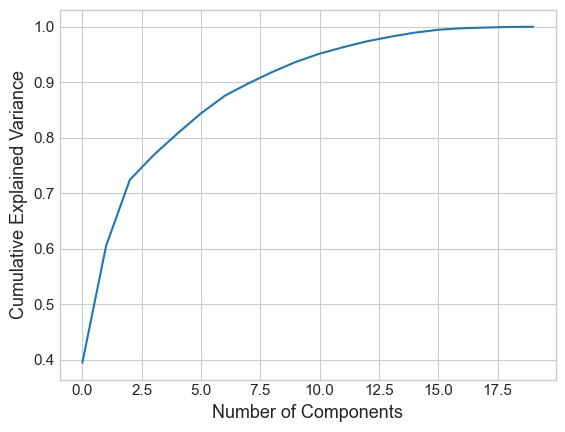

Number of components for 95% variance: 11


In [133]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_selected)  # Or X_train_prep if you are not using feature selection

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

import matplotlib.pyplot as plt
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Find the minimum number of components to reach your threshold
n_components = next(i for i, cum_var in enumerate(cumulative_variance) if cum_var >= 0.95) + 1
print("Number of components for 95% variance:", n_components)

In [134]:
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

After the PCA, the training and test datasets for the Machine Learning models are composed of 11 new features that are a linear combination of the original 20 ones, that capture the directions of greatest variance in the data.

## 4. Machine Learning Model Deployment

After the data has been analyzed and preparated, it is time to develop the Machine Learning models that will try to achieve the **goal** of the project, **classifying** and **predicting** the `Target` variable.

As the labels (Target variable) are known and handed, this is a supervised learning type of problem. For it to be solved, **Classification** models will be implemented in ascending grade of complexity, to then be compared and select the best posible solution.

**(Disclaimer: Concrete figures during the report may be taken as approximations, since rerunning the cells could make them vary slightly)**

### 4.1 Logistic Regression

This is the first algorithm choosen to develop, in particular a **Multinomial Logistic Regression**, as the `Target` variable contains three possible outcomes: Graduate, Drop out, Enrolled.

The class imbalance of **Target** will also be taken into account in the implementation for the correct performance of the model.

              precision    recall  f1-score   support

     Dropout       0.67      0.61      0.64       706
    Enrolled       0.37      0.51      0.43       509
    Graduate       0.83      0.76      0.80      1475

    accuracy                           0.67      2690
   macro avg       0.62      0.63      0.62      2690
weighted avg       0.70      0.67      0.69      2690



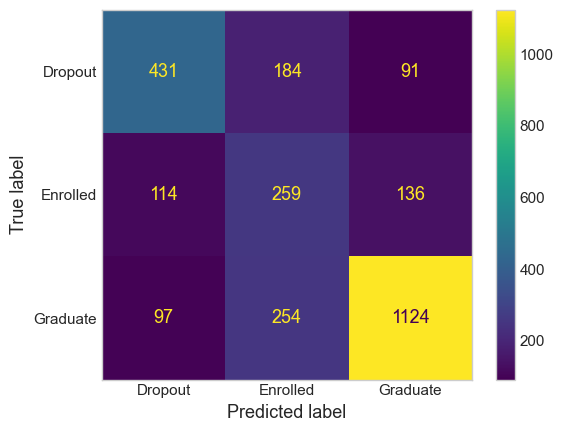

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay

clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, class_weight='balanced')

clf.fit(X_train_pca, y_train_clean)

y_pred_train = cross_val_predict(clf, X_train_pca, y_train_clean)

print(classification_report(y_train_clean, y_pred_train))

# Confussion matrix representation

disp = ConfusionMatrixDisplay.from_predictions(y_train_clean, y_pred_train)
ax = plt.gca()  
ax.grid(False)
plt.show()

- `Statistics Interpretation:`

1. **Classification Report**:

   **Dropout** - 67% in F1-score, good performance.

   **Enrolled** - lowest precision (40%) and recall (52%), the model has more difficulty both correctly predicting “Enrolled” and indentifying all “Enrolled” cases.

   **Graduate** - Highest performance (80%), the model is best at indentifying graduates.

   

2. **Confussion Matrix**:

   **Dropout** - 460 correctly predicted, 156 misclassified as Enrolled, 90 as Graduate.

   **Enrolled** - 266 correct, 103 misclassified as Dropout, 140 as Graduate.

   **Graduate** - 1136 correct, 97 missclassified as Dropout, 242 as Enrolled.

   

* `Model's Evaluation with Cross-Validation:`

To get a better estimate of the model's true performance and reduce variance, evaluating the model with Cross-Validation will be done.

In [139]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train_pca, y_train_clean, cv=5, scoring='f1_macro')
print("Cross-validated F1 (macro) scores:", scores)
print("Mean F1 (macro):", scores.mean())

Cross-validated F1 (macro) scores: [0.64430508 0.59556415 0.64679861 0.60265578 0.61437399]
Mean F1 (macro): 0.6207395232570174


The mean cross-validated F1 (macro) score - 0.642, is very close to the one obtained in the report earlier - 0.64, this indicates that the model is stable and not particuarly dependent on a particular data split.

The results indicate that the model generalizes well on unseen data and it's not overfitting.

### 4.2 Decission Tree Classifier

The second model selected for the classification task is a **Decission Tree Classifier**, increasing the complexity of the algorithm used in order to try to obtain better results.

              precision    recall  f1-score   support

     Dropout       0.54      0.51      0.52       706
    Enrolled       0.34      0.37      0.35       509
    Graduate       0.75      0.74      0.75      1475

    accuracy                           0.61      2690
   macro avg       0.54      0.54      0.54      2690
weighted avg       0.62      0.61      0.61      2690



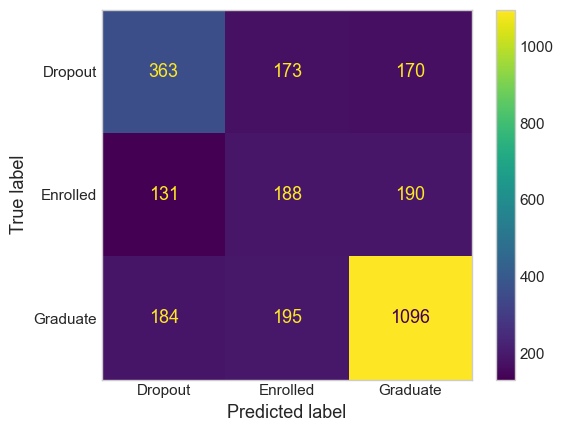

Cross-validated F1 (macro) scores: [0.52137778 0.51479871 0.57450301 0.55797089 0.53980321]
Mean F1 (macro): 0.5416907218565195


In [140]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

dt_clf.fit(X_train_pca, y_train_clean)

y_pred_train = cross_val_predict(dt_clf, X_train_pca, y_train_clean)

print(classification_report(y_train_clean, y_pred_train))

disp = ConfusionMatrixDisplay.from_predictions(y_train_clean, y_pred_train)
ax = plt.gca()  
ax.grid(False)
plt.show()

# Cross validation evaluation

scores = cross_val_score(dt_clf, X_train_pca, y_train_clean, cv=5, scoring='f1_macro')
print("Cross-validated F1 (macro) scores:", scores)
print("Mean F1 (macro):", scores.mean())

* The Decission Tree Classifier performs significantly **worse** than the previous model, having lower F1-scores in each of the 3 Target classes. The worst performing one **Enrolled**, has a F1-score of 29%. This can be seen in the Confussion Matrix, where the model misclassifies even more students as Graduates than the ones that correctly classifes as Enrolled, with an also poor performance misclassifying true Enrolled students as Dropouts.

* F1-score obtained with cross-validation is similar to the one obtained in the classification report (52.9% and 53%), so the model is not suffering from overfitting.

### 4.3 Random Forest Classifier

**Random** Forest is an ensemble bagging Machine Learning technique that contains a high number of Decission Trees that work all together to, in this case, classify new points. This is the next model selected to try for the classification task of **Target**.

              precision    recall  f1-score   support

     Dropout       0.68      0.63      0.65       706
    Enrolled       0.40      0.24      0.30       509
    Graduate       0.76      0.89      0.82      1475

    accuracy                           0.70      2690
   macro avg       0.61      0.59      0.59      2690
weighted avg       0.67      0.70      0.68      2690



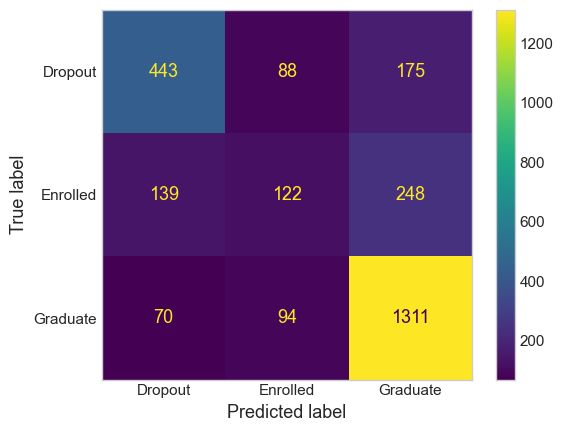

Cross-validated F1 (macro) scores: [0.56674048 0.58502382 0.59055508 0.599898   0.60619114]
Mean F1 (macro): 0.5896817024990914


In [141]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_clf.fit(X_train_pca, y_train_clean)
y_pred_train = cross_val_predict(rf_clf, X_train_pca, y_train_clean)

print(classification_report(y_train_clean, y_pred_train))

disp = ConfusionMatrixDisplay.from_predictions(y_train_clean, y_pred_train)
ax = plt.gca()  
ax.grid(False)
plt.show()

scores = cross_val_score(rf_clf, X_train_pca, y_train_clean, cv=5, scoring='f1_macro')
print("Cross-validated F1 (macro) scores:", scores)
print("Mean F1 (macro):", scores.mean())

### 4.4 SMOTE - Addressing the Class Imbalance Problem

In all the implemented models so far, it is clear that all the models are underperforming classifying **Enrolled** students. This is due to the **class imbalance** present at the dataset, and was addressed while splitting the dataset in training and test sets and while implementing each specific classifying model. 

This issue can be fixed implementing **SMOTE** (Synthetic Minority Over-sampling Technique), this technique generates synthetic samples for minority classes to balance the dataset. It will be implemented and tested on the worst perfoming model, the **Decission Tree Classifier**.

              precision    recall  f1-score   support

     Dropout       0.75      0.75      0.75      1475
    Enrolled       0.68      0.72      0.70      1475
    Graduate       0.72      0.68      0.70      1475

    accuracy                           0.72      4425
   macro avg       0.72      0.72      0.72      4425
weighted avg       0.72      0.72      0.72      4425



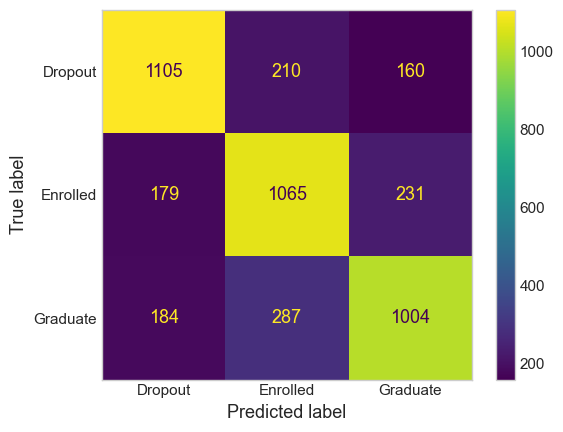

Cross-validated F1 (macro) scores: [0.66325385 0.71291049 0.71543259 0.73519488 0.75944166]
Mean F1 (macro): 0.717246693175323


In [142]:
from imblearn.over_sampling import SMOTE

#SMOTE implementation
smote = SMOTE(random_state = 42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train_clean)

#Refitting the PCA with the resampled sets
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_selected)

#Retraining the Decission Tree Classifier
dt_clf.fit(X_train_pca, y_train_resampled)

y_pred_train = cross_val_predict(dt_clf, X_train_pca, y_train_resampled)

print(classification_report(y_train_resampled, y_pred_train))

disp = ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train)
ax = plt.gca()  
ax.grid(False)
plt.show()

# Cross validation evaluation
scores = cross_val_score(dt_clf, X_train_pca, y_train_resampled, cv=5, scoring='f1_macro')
print("Cross-validated F1 (macro) scores:", scores)
print("Mean F1 (macro):", scores.mean())

The perfomance greatly increased in comparison to the Decission Tree Classifier without SMOTE:

* `Dropout`: F1-score (SMOTE) - 73% vs F1-score (old) - 56%

* `Enrolled`: F1-score (SMOTE) - 70% vs F1-score (old) - 29%

   This was the main imbalanced class that was dragging the model's performance. Now the issue seems solved. 

* `Graduate`: F1-score (SMOTE) - 69% vs F1-score (old) - 73%

   This is the only class that perfoms worse than before implementing SMOTE, but the downgrade acceptable taking in account the performance in the other metrics.

* `Cross validation score`: F1-score (SMOTE) - 71% vs F1-score (old) - 52.9%

Clearly the performance is superior after implementing SMOTE, and it will be applied to the other models implemented before.

* `Logistic Regression with SMOTE`:

              precision    recall  f1-score   support

     Dropout       0.71      0.64      0.67      1475
    Enrolled       0.58      0.56      0.57      1475
    Graduate       0.67      0.76      0.71      1475

    accuracy                           0.65      4425
   macro avg       0.65      0.65      0.65      4425
weighted avg       0.65      0.65      0.65      4425



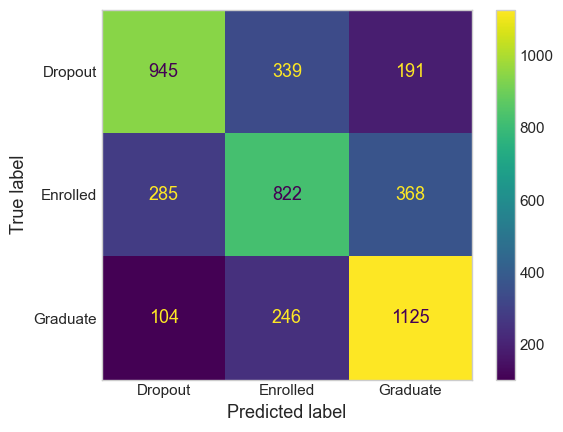

Cross-validated F1 (macro) scores: [0.65806878 0.64759953 0.64876089 0.6459286  0.65712786]
Mean F1 (macro): 0.6514971323067312


In [143]:
clf.fit(X_train_pca, y_train_resampled)

y_pred_train = cross_val_predict(clf, X_train_pca, y_train_resampled)

print(classification_report(y_train_resampled, y_pred_train))

disp = ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train)
ax = plt.gca()  
ax.grid(False)
plt.show()

# Cross validation evaluation
scores = cross_val_score(clf, X_train_pca, y_train_resampled, cv=5, scoring='f1_macro')
print("Cross-validated F1 (macro) scores:", scores)
print("Mean F1 (macro):", scores.mean())

Logistic regression follows a similar behaviour as the one displayed before, performances are better in classifying Dropout, notably better in Enrolled (58% vs 45%) and the downgrade in Graduate is acceptable (72% to 80%). The F1-score from cross validation also improves the old one (65.8% to 64.2%).

* `Random Forest with SMOTE`:

              precision    recall  f1-score   support

     Dropout       0.85      0.84      0.84      1475
    Enrolled       0.79      0.83      0.81      1475
    Graduate       0.81      0.78      0.80      1475

    accuracy                           0.82      4425
   macro avg       0.82      0.82      0.82      4425
weighted avg       0.82      0.82      0.82      4425



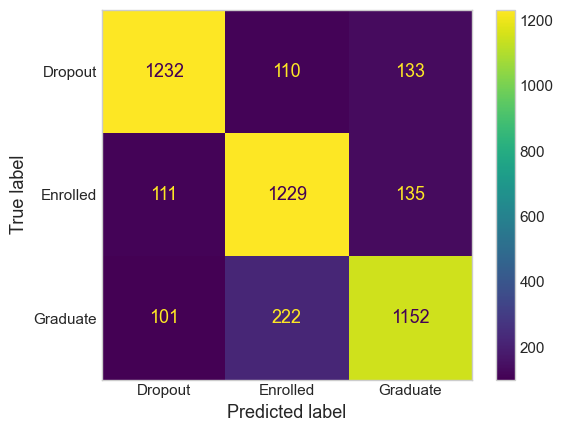

Cross-validated F1 (macro) scores: [0.78290496 0.78335007 0.81879656 0.8330072  0.86418877]
Mean F1 (macro): 0.8164495119870446


In [144]:
rf_clf.fit(X_train_pca, y_train_resampled)

y_pred_train = cross_val_predict(rf_clf, X_train_pca, y_train_resampled)

print(classification_report(y_train_resampled, y_pred_train))

disp = ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train)
ax = plt.gca()  
ax.grid(False)
plt.show()

# Cross validation evaluation
scores = cross_val_score(rf_clf, X_train_pca, y_train_resampled, cv=5, scoring='f1_macro')
print("Cross-validated F1 (macro) scores:", scores)
print("Mean F1 (macro):", scores.mean())

Now the Random Forest Classifier is the **best performing** algorithm so far, improving obviously the old one without SMOTE in every category except Graduate, but the downgrade is minimum (80% vs 82%). It also overperforms the Logistic Regressor and Decission Tree Classifier, having the best cross validation F1-score (82%).

### 4.5 XGBoost Classifier

Finally gradient boosting techniques will be implemented, where the final model is built by each subsequent previous model, fixing the errors of previous stages.

In this case, the algorithm used is an **Extreme Gradient Boost Classifier** (XGBoost), known for its efficiency and flexibility.

              precision    recall  f1-score   support

     Dropout       0.84      0.81      0.82      1475
    Enrolled       0.76      0.82      0.79      1475
    Graduate       0.80      0.77      0.79      1475

    accuracy                           0.80      4425
   macro avg       0.80      0.80      0.80      4425
weighted avg       0.80      0.80      0.80      4425



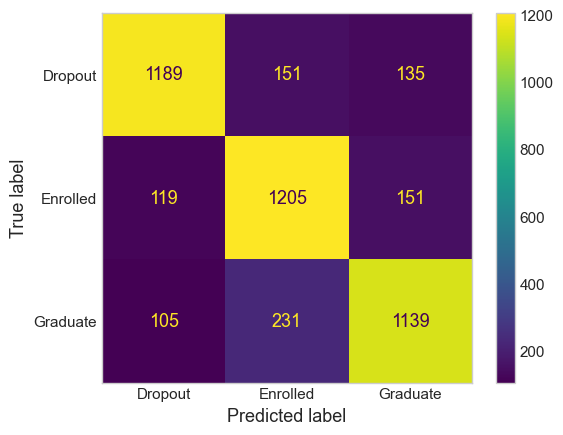

Cross-validated F1 (macro) scores: [0.75917468 0.76165693 0.81326949 0.80800656 0.84976156]
Mean F1 (macro): 0.7983738420953224


In [145]:
import xgboost as xgb
from xgboost import XGBClassifier

# Encode target sets
y_train_encoded =  le.transform(y_train_resampled)
y_test_encoded = le.transform(y_test) # will be used in CatBoost

xgb_clf = XGBClassifier(
    objective='multi:softprob', 
    num_class=3,                
    eval_metric='mlogloss',
    random_state=42
)

xgb_clf.fit(X_train_pca, y_train_encoded)

y_pred_train = cross_val_predict(xgb_clf, X_train_pca, y_train_encoded)

print(classification_report(y_train_encoded, y_pred_train, target_names=le.classes_))

disp = ConfusionMatrixDisplay.from_predictions(y_train_encoded, y_pred_train, display_labels=le.classes_)
ax = plt.gca()  
ax.grid(False)
plt.show()

# Cross validation evaluation
scores = cross_val_score(xgb_clf, X_train_pca, y_train_encoded, cv=5, scoring='f1_macro')
print("Cross-validated F1 (macro) scores:", scores)
print("Mean F1 (macro):", scores.mean())


XGBoost performs slighty worse than Random Forest - 80.3 % vs 82 % in cross validation F1-score. Nontheless, it's a decent performance.

### 4.6 CatBoost Classifier

The last classifying method implemented will be **CatBoost Classifier**, a gradient boosting model that natively handles categorical data.

0:	learn: 1.0772480	test: 1.0774064	best: 1.0774064 (0)	total: 159ms	remaining: 1m 19s
100:	learn: 0.6844259	test: 0.7902070	best: 0.7902070 (100)	total: 555ms	remaining: 2.19s
200:	learn: 0.6001797	test: 0.7745790	best: 0.7743549 (199)	total: 950ms	remaining: 1.41s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.7743548963
bestIteration = 199

Shrink model to first 200 iterations.
0:	learn: 1.0771360	total: 4.57ms	remaining: 2.28s
100:	learn: 0.6729798	total: 366ms	remaining: 1.44s
200:	learn: 0.5803846	total: 732ms	remaining: 1.09s
300:	learn: 0.5144563	total: 1.1s	remaining: 726ms
400:	learn: 0.4593090	total: 1.45s	remaining: 359ms
499:	learn: 0.4183909	total: 1.81s	remaining: 0us
0:	learn: 1.0782469	total: 3.41ms	remaining: 1.7s
100:	learn: 0.6716160	total: 381ms	remaining: 1.5s
200:	learn: 0.5817434	total: 743ms	remaining: 1.1s
300:	learn: 0.5157165	total: 1.13s	remaining: 749ms
400:	learn: 0.4609941	total: 1.52s	remaining: 376ms
499:	learn: 0.4156563	total: 1.

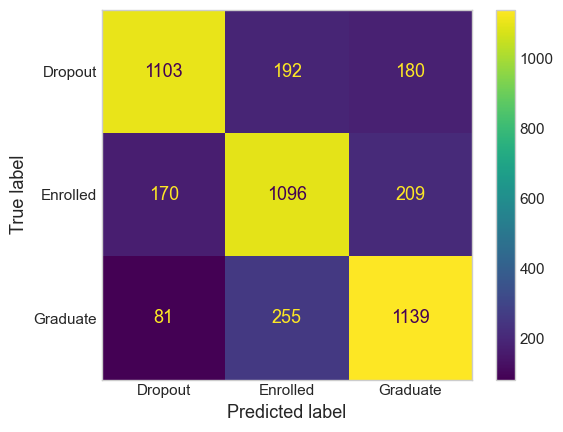

0:	learn: 1.0771360	total: 3.97ms	remaining: 1.98s
100:	learn: 0.6729798	total: 386ms	remaining: 1.52s
200:	learn: 0.5803846	total: 761ms	remaining: 1.13s
300:	learn: 0.5144563	total: 1.13s	remaining: 749ms
400:	learn: 0.4593090	total: 1.5s	remaining: 371ms
499:	learn: 0.4183909	total: 1.89s	remaining: 0us
0:	learn: 1.0782469	total: 3.7ms	remaining: 1.85s
100:	learn: 0.6716160	total: 388ms	remaining: 1.53s
200:	learn: 0.5817434	total: 749ms	remaining: 1.11s
300:	learn: 0.5157165	total: 1.13s	remaining: 744ms
400:	learn: 0.4609941	total: 1.49s	remaining: 368ms
499:	learn: 0.4156563	total: 1.87s	remaining: 0us
0:	learn: 1.0782278	total: 3.71ms	remaining: 1.85s
100:	learn: 0.6791185	total: 369ms	remaining: 1.46s
200:	learn: 0.5941147	total: 750ms	remaining: 1.12s
300:	learn: 0.5286764	total: 1.13s	remaining: 747ms
400:	learn: 0.4776113	total: 1.53s	remaining: 379ms
499:	learn: 0.4365272	total: 1.91s	remaining: 0us
0:	learn: 1.0759296	total: 4.05ms	remaining: 2.02s
100:	learn: 0.6870537	to

In [146]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    loss_function='MultiClass',
    random_seed=42,
    verbose=100
)

cat_clf.fit(
    X_train_pca, y_train_encoded,
    eval_set=(X_test_pca, y_test_encoded),
    early_stopping_rounds=30
)

y_pred_train = cross_val_predict(cat_clf, X_train_pca, y_train_encoded)

print(classification_report(y_train_encoded, y_pred_train, target_names=le.classes_))

disp = ConfusionMatrixDisplay.from_predictions(y_train_encoded, y_pred_train, display_labels=le.classes_)
ax = plt.gca()  
ax.grid(False)
plt.show()

# Cross validation evaluation
scores = cross_val_score(cat_clf, X_train_pca, y_train_encoded, cv=5, scoring='f1_macro')
print("Cross-validated F1 (macro) scores:", scores)
print("Mean F1 (macro):", scores.mean())

XGBoost and Random Forest are superior to CatBoost.

### 4.7 Comparison and Selection

**The comparison metric selected is the F1-score, as it is the harmonic mean of precission and recall.**

|         Model       |  Dropout(F1)  |  Enrolled(F1)  |  Graduate(F1)  |  CV Mean F1  |  
|---------------------|---------------|----------------|----------------|--------------|
| Logistic Regression |      68       |       58       |       72       |     65.8     |
| Decission Tree      |      73       |       70       |       69       |     70.9     |
| Random Forest       |      85       |       81       |       80       |     82       |
| XGBoost             |      82       |       80       |       79       |     80.3     |
| CatBoost            |      78       |       74       |       78       |     76.8     |

* **Random Forest and XGBoost** are the two best performing models in the classification task of `Target`. For this reason the two of them are selected for the next phase, fine-tuning.

## 5. Hyperparameter Fine-tuning

Now that the final models are selected for the last phases of the project, is time to fine-tune them in order to obtain the best performance as possible tweaking the hyperparameters that compose both of them.

### 5.1 Pipelines

To improve workflow organization, facilitate error tracing, and provide a clearer overview of the entire process, pipelines will be implemented for both models. This ensures that all preprocessing and modeling steps are systematically structured and reproducible.

Both pipelines start after `Outlier removal`, as implementing it in the pipeline could lead to issues in next steps, specifically with cross-validation that will be the main component of **Fine-tuning**.

In [147]:
from imblearn.pipeline import Pipeline

# RF Pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor), #this is the pipeline created earlier for encoding-scaling
    ('feature_selection', SelectKBest(score_func=mutual_info_classif)),
    ('smote', SMOTE(random_state=42)),
    ('pca', PCA()),
    ('clf', RandomForestClassifier(random_state=42))  
])

# XGBoost Pipeline
pipeline_xgboost = Pipeline([
    ('preprocessor', preprocessor), 
    ('feature_selection', SelectKBest(score_func=mutual_info_classif)),
    ('smote', SMOTE(random_state=42)),
    ('pca', PCA()),
    ('clf', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

### 5.2 Randomized Search Cross Validation

This will be the first method of fine-tuning implemented, where a random amount of different values per hyperparameter are explored. The spread of values is inputed manually, enabling the control over computing cost.

c:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:40:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


-------------------- Random Forest Results -----------------------
    mean_test_score  std_test_score  \
21         0.815769        0.016674   
7          0.812297        0.010323   
26         0.811621        0.016767   
25         0.811428        0.001813   
20         0.808983        0.013045   
9          0.808154        0.011185   
0          0.806574        0.017561   
2          0.804497        0.011668   
6          0.804274        0.009019   
11         0.804211        0.007751   

                                               params  
21  {'clf__max_depth': 6, 'clf__max_features': 'sq...  
7   {'clf__max_depth': 6, 'clf__max_features': 'lo...  
26  {'clf__max_depth': 5, 'clf__max_features': 'lo...  
25  {'clf__max_depth': 9, 'clf__max_features': 'lo...  
20  {'clf__max_depth': 6, 'clf__max_features': 'lo...  
9   {'clf__max_depth': 3, 'clf__max_features': 'lo...  
0   {'clf__max_depth': 9, 'clf__max_features': 'sq...  
2   {'clf__max_depth': 8, 'clf__max_features': 'sq...  

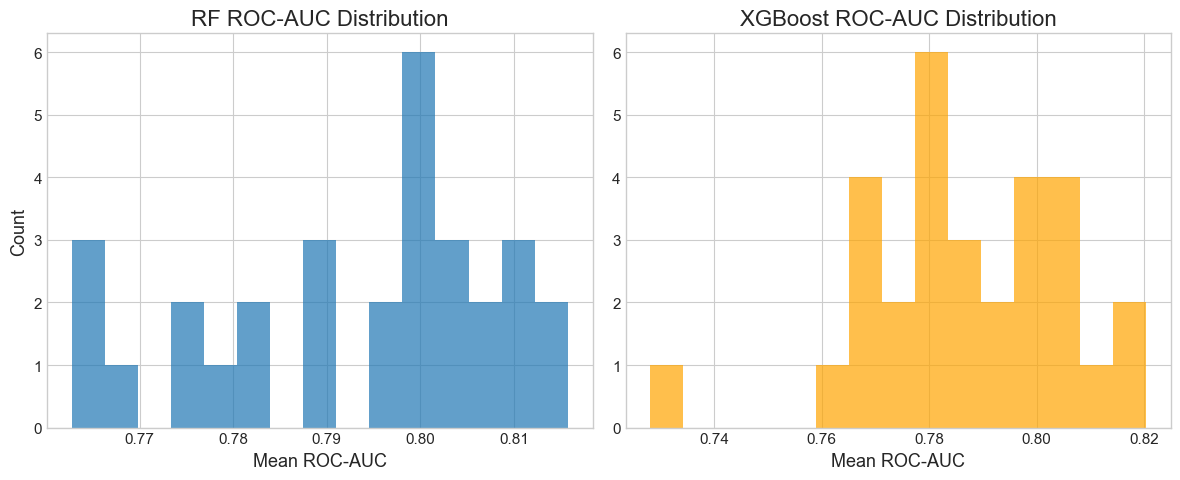

In [149]:
from scipy.stats import randint, uniform, loguniform
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Distribution of parameters for Random Forest and XGBoost
param_dist_rf = {  
    'feature_selection__k': randint(8, 15),  
    'smote__k_neighbors': randint(3, 6),   # Lowered for safety
    'pca__n_components': randint(2, 8),     # Must be <= min(feature_selection__k)
    'clf__n_estimators': randint(100, 400),
    'clf__max_depth': randint(3, 10),
    'clf__min_samples_split': randint(2, 10),
    'clf__min_samples_leaf': randint(1, 5),
    'clf__max_features': ['sqrt', 'log2', None],
}

param_dist_xgboost = {  
    'feature_selection__k': randint(8, 15),  
    'smote__k_neighbors': randint(3, 6),
    'pca__n_components': randint(2, 8),
    'clf__n_estimators': randint(100, 400),
    'clf__max_depth': randint(3, 10),
    'clf__learning_rate': loguniform(0.01, 0.3),
    'clf__subsample': uniform(0.7, 0.3),  # between 0.7 and 1.0
    'clf__colsample_bytree': uniform(0.7, 0.3),  # between 0.7 and 1.0
    'clf__gamma': loguniform(1e-8, 1.0),
}

# Stratified CV to avoid single-class splits
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Random Search Cross Validation initialization
search_rf = RandomizedSearchCV(
    pipeline_rf,  
    param_distributions=param_dist_rf,
    n_iter=30,                 # Fewer iterations for fast debug
    cv=cv,
    scoring='roc_auc_ovr',
    random_state=42,
    n_jobs=-1,
    error_score='raise'        # Immediate feedback if a fit fails
)

search_xgboost = RandomizedSearchCV(
    pipeline_xgboost,  
    param_distributions=param_dist_xgboost,
    n_iter=30,
    cv=cv,
    scoring='roc_auc_ovr',
    random_state=42,
    n_jobs=-1,
    error_score='raise'
)

# Fitting (X_train_clean, y_train_clean after outlier removal)
# XGBoost needs to be fitted with encoded y_train
y_train_encoded =  le.fit_transform(y_train_clean)
search_rf.fit(X_train_clean, y_train_encoded)
search_xgboost.fit(X_train_clean, y_train_encoded) 

# Visualization of results
rf_results = pd.DataFrame(search_rf.cv_results_)
rf_results = rf_results.sort_values(by='mean_test_score', ascending=False)
print('-------------------- Random Forest Results -----------------------')
print(rf_results[['mean_test_score', 'std_test_score', 'params']].head(10))

xgb_results = pd.DataFrame(search_xgboost.cv_results_)
xgb_results = xgb_results.sort_values(by='mean_test_score', ascending=False)
print('----------------------- XGBoost Results -------------------------')
print(xgb_results[['mean_test_score', 'std_test_score', 'params']].head(10))

# ROC-AUC Distribution
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(rf_results['mean_test_score'], bins=15, alpha=0.7)
plt.title('RF ROC-AUC Distribution')
plt.xlabel('Mean ROC-AUC')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(xgb_results['mean_test_score'], bins=15, alpha=0.7, color='orange')
plt.title('XGBoost ROC-AUC Distribution')
plt.xlabel('Mean ROC-AUC')

plt.tight_layout()
plt.show()

* Best **Random Forest** ROC-AUC score is about 0.816
* Best **XGBoost** ROC-AUC score is about 0.82
* Standard deviations are reasonable, suggesting stable results across folds.
* Histograms distributions are tight, indicating that most configurations perform similarly, with few outliers.

Now the best paremeters will be obtained for further comparison with the second fine-tuning method that will be later implemented:

In [150]:
best_params_rf = search_rf.best_params_
best_params_xgb = search_xgboost.best_params_
print('Random Forest Best Params:')
print(best_params_rf)
print('XGBoost Best Params:')
print(best_params_xgb)

Random Forest Best Params:
{'clf__max_depth': 6, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 8, 'clf__n_estimators': 286, 'feature_selection__k': 10, 'pca__n_components': 7, 'smote__k_neighbors': 4}
XGBoost Best Params:
{'clf__colsample_bytree': np.float64(0.9339626637572871), 'clf__gamma': np.float64(0.001368526366943019), 'clf__learning_rate': np.float64(0.013313275850595153), 'clf__max_depth': 6, 'clf__n_estimators': 203, 'clf__subsample': np.float64(0.881928717897877), 'feature_selection__k': 10, 'pca__n_components': 7, 'smote__k_neighbors': 3}


### 5.3 Grid Search Cross Validation - for Random Forest

With the parameters obtained from **RandomizedSearchCV**, it is possible to refine the Parameter Grid to further fine-tune using `GridSearchCV`, a fine-tuning method that evaluates all possible combinations.

**GridSearchCV** is an exhaustive method, it works as mentioned earlier, evaluating each possible combination, so it's computional heavy. Because of that it searchs for the best possible combination, but it's recommended to use in models with few hyperparameters and fast trials, such as **Random Forest**. 

**(Disclaimer: next cell may take long to run)**

Fitting 3 folds for each of 4374 candidates, totalling 13122 fits
-------------------- Random Forest Results -----------------------
      mean_test_score  std_test_score  \
3617         0.828003        0.012067   
3058         0.827334        0.012615   
4255         0.827311        0.013328   
3453         0.827161        0.009891   
3065         0.826940        0.013680   
3866         0.826892        0.011371   
2678         0.826879        0.011160   
3351         0.826834        0.011060   
3877         0.826807        0.011338   
3732         0.826573        0.013415   

                                                 params  
3617  {'clf__max_depth': 7, 'clf__max_features': 'sq...  
3058  {'clf__max_depth': 7, 'clf__max_features': 'sq...  
4255  {'clf__max_depth': 7, 'clf__max_features': 'lo...  
3453  {'clf__max_depth': 7, 'clf__max_features': 'sq...  
3065  {'clf__max_depth': 7, 'clf__max_features': 'sq...  
3866  {'clf__max_depth': 7, 'clf__max_features': 'lo...  
2678  {'c

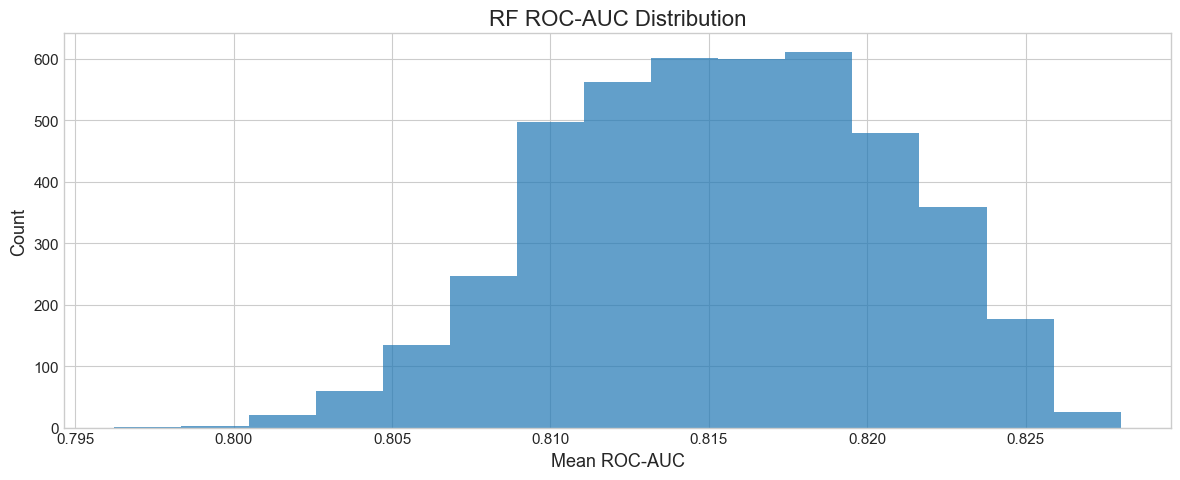

Best RF params: {'clf__max_depth': 7, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 9, 'clf__n_estimators': 286, 'feature_selection__k': 11, 'pca__n_components': 8, 'smote__k_neighbors': 5}
Best RF ROC-AUC: 0.828003215337977


In [151]:
from sklearn.model_selection import GridSearchCV

# Refined Param Grids
grid_params_rf = {
    'clf__max_depth': [5, 6, 7],  # ±1 around 6
    'clf__max_features': ['sqrt', 'log2'],  # keep best and closest other
    'clf__min_samples_leaf': [3, 4, 5],     # ±1 around 4
    'clf__min_samples_split': [7, 8, 9],    # ±1 around 8
    'clf__n_estimators': [236, 286, 336],   # ±50 around 286
    'feature_selection__k': [9, 10, 11],    # ±1 around 10
    'pca__n_components': [6, 7, 8],         # ±1 around 7, not > k
    'smote__k_neighbors': [3, 4, 5],        # ±1 around 4
}

# GridSearchCV initialization
grid_rf = GridSearchCV(
    pipeline_rf,
    param_grid=grid_params_rf,
    cv=cv,
    scoring='roc_auc_ovr',
    n_jobs=-1,
    verbose=2
)


# Fitting
grid_rf.fit(X_train_clean, y_train_encoded)

# Visualization of results
rf_results = pd.DataFrame(grid_rf.cv_results_)
rf_results = rf_results.sort_values(by='mean_test_score', ascending=False)
print('-------------------- Random Forest Results -----------------------')
print(rf_results[['mean_test_score', 'std_test_score', 'params']].head(10))

# ROC-AUC Distribution
plt.figure(figsize=(12,5))

plt.hist(rf_results['mean_test_score'], bins=15, alpha=0.7)
plt.title('RF ROC-AUC Distribution')
plt.xlabel('Mean ROC-AUC')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Best parameters and score
print("Best RF params:", grid_rf.best_params_)
print("Best RF ROC-AUC:", grid_rf.best_score_)

* Best ROC-AUC score is now about **0.828**, improving the result obtained from RandomSearchCV, 0.816.
* Distribution looks almost **Normal** (Bell-shaped), indicating the **robustness** of Random Forest and **the uniform process** of GridSearchCV. 

### 5.4 Optuna - for XGBoost

**XGBoost** counts with many more hyperparameters, with wider and continuous search spaces than **Random Forest**. This would make Grid Search become exponentially slower and even may be infeasible. That's why `Optuna` is preferred for hyperparameter heavy models, as it uses adaptatives strategies of bayesian optimization to fine-tune, delivering better results in this case.

In [153]:
import optuna

def objective(trial):
    # Sample feature selection k first
    k = trial.suggest_int('feature_selection__k', 3, X_train_clean.shape[1])
    # Now sample PCA components with upper bound = k
    n_components = trial.suggest_int('pca__n_components', 2, k)
    # Other params as before...
    params = {
        'clf__max_depth': trial.suggest_int('clf__max_depth', 3, 12),
        'clf__n_estimators': trial.suggest_int('clf__n_estimators', 50, 400),
        'clf__learning_rate': trial.suggest_float('clf__learning_rate', 1e-3, 0.2, log=True),
        'clf__colsample_bytree': trial.suggest_float('clf__colsample_bytree', 0.5, 1.0),
        'clf__subsample': trial.suggest_float('clf__subsample', 0.5, 1.0),
        'clf__gamma': trial.suggest_float('clf__gamma', 0, 1.0),
        'feature_selection__k': k,
        'pca__n_components': n_components,
        'smote__k_neighbors': trial.suggest_int('smote__k_neighbors', 2, 10)
    }
    pipeline_xgboost.set_params(**params)
    score = cross_val_score(
        pipeline_xgboost,
        X_train_clean,
        y_train_encoded,
        scoring='roc_auc_ovr',
        cv=cv,
        n_jobs=-1
    ).mean()
    return score 


sampler = optuna.samplers.TPESampler(seed=42) # Sampler for reproducibility
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=50)  

print('Best params:', study.best_params)
print('Best ROC-AUC:', study.best_value)

[I 2025-08-14 13:26:07,794] A new study created in memory with name: no-name-b82b20eb-899e-40c6-9e05-13e988f3bd8e
[I 2025-08-14 13:26:11,248] Trial 0 finished with value: 0.8197148892954794 and parameters: {'feature_selection__k': 11, 'pca__n_components': 11, 'clf__max_depth': 10, 'clf__n_estimators': 260, 'clf__learning_rate': 0.0022856175997064752, 'clf__colsample_bytree': 0.5779972601681014, 'clf__subsample': 0.5290418060840998, 'clf__gamma': 0.8661761457749352, 'smote__k_neighbors': 7}. Best is trial 0 with value: 0.8197148892954794.
[I 2025-08-14 13:26:12,825] Trial 1 finished with value: 0.7390990001200443 and parameters: {'feature_selection__k': 19, 'pca__n_components': 2, 'clf__max_depth': 12, 'clf__n_estimators': 342, 'clf__learning_rate': 0.0030803400529839683, 'clf__colsample_bytree': 0.5909124836035503, 'clf__subsample': 0.5917022549267169, 'clf__gamma': 0.3042422429595377, 'smote__k_neighbors': 6}. Best is trial 0 with value: 0.8197148892954794.
[I 2025-08-14 13:26:14,061]

Best params: {'feature_selection__k': 26, 'pca__n_components': 26, 'clf__max_depth': 6, 'clf__n_estimators': 400, 'clf__learning_rate': 0.022669637416580277, 'clf__colsample_bytree': 0.8846915468913171, 'clf__subsample': 0.62077746649017, 'clf__gamma': 0.5314836160610861, 'smote__k_neighbors': 5}
Best ROC-AUC: 0.8289930196512575


* Best ROC-AUC score is now about **0.829**, improving the result obtained from RandomSearchCV, 0.82.

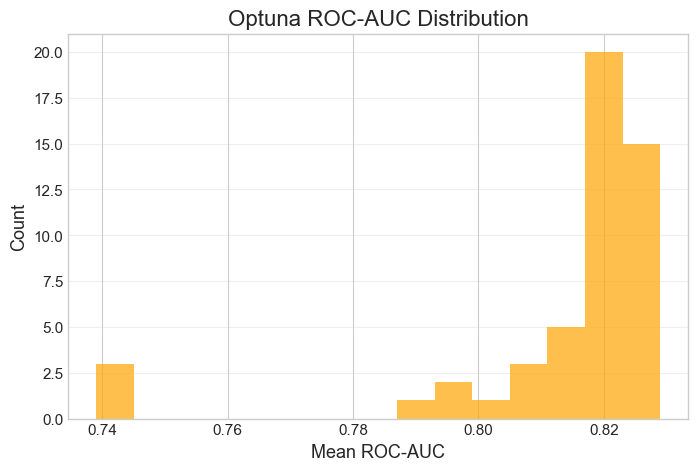

In [154]:
# ROC-AUC Distribution
roc_auc_scores = [trial.value for trial in study.trials if trial.value is not None]

plt.figure(figsize=(8, 5))
plt.hist(roc_auc_scores, bins=15, alpha=0.7, color='orange')
plt.title('Optuna ROC-AUC Distribution')
plt.xlabel('Mean ROC-AUC')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

* Distribution is **left-skewed**, meaning most trials achieved high ROC-AUC, and only few trials performed poorly.

To obtain even tigher performance, narrowing the paramters ranges or increasing the trials could be conducted.

## 6. Evaluation and Conclusions

Lastly, after selecting the best performing models and obtaining their most optimized hyperparameters, it's time for the final evaluation on unseen data: **the Test set**. This will showcase how well the models perform and adapt to new data and serves as the last point to draw a final conclussion.

### 6.1 Evaluation on the Test Set

In [ ]:
# Refit Random Forest with best params
pipeline_rf.set_params(**grid_rf.best_params_)
pipeline_rf.fit(X_train_clean, y_train_encoded)
rf_preds = pipeline_rf.predict(X_test)
rf_proba = pipeline_rf.predict_proba(X_test)

# Refit XGBoost with best params
pipeline_xgboost.set_params(**study.best_params)
pipeline_xgboost.fit(X_train_clean, y_train_encoded)
xgb_preds = pipeline_xgboost.predict(X_test)
xgb_proba = pipeline_xgboost.predict_proba(X_test)

# Evaluation on test set
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

print("Random Forest ROC-AUC:", roc_auc_score(y_test_encoded, rf_proba, multi_class='ovr'))
print("XGBoost ROC-AUC:", roc_auc_score(y_test_encoded, xgb_proba, multi_class='ovr'))
print("Random Forest Acc:", accuracy_score(y_test_encoded, rf_preds))
print("XGBoost Acc:", accuracy_score(y_test_encoded, xgb_preds))
print("Random Forest F1:", f1_score(y_test_encoded, rf_preds, average='weighted'))
print("XGBoost F1:", f1_score(y_test_encoded, xgb_preds, average='weighted'))

c:\Users\Windows\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:53:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest ROC-AUC: 0.8250056787346196
XGBoost ROC-AUC: 0.8307023555503837
Random Forest Acc: 0.6609403254972875
XGBoost Acc: 0.7034358047016275
Random Forest F1: 0.6747952603068845
XGBoost F1: 0.7040687929676529


| Model          | ROC-AUC | Accuracy | F1 Score |
|----------------|---------|----------|----------|
| Random Forest  | 0.8250  | 0.661    | 0.675    |
| XGBoost        | 0.8307  | 0.703    | 0.704    |

* After fine-tuning, **XGBoost** has higher ROC-AUC, accuracy, and F1, indicating better overall performance.
* Performance dropped about **14%** compared to the one obtained during training (F1-score). This is because the **Test set** wasn't preprocessed at all to simulate how well the models would do facing new, unseen data. 

`XGBoost` would be the final selected model, as it's the one performing the best on the test set.

### 6.2 Error Analysis

To understand the real-world behaviour of the selected final model, errors will be analyzed to gain insights into its weaknesses, possible data issues, or systematic misclassifications.

              precision    recall  f1-score   support

     Dropout       0.70      0.72      0.71       355
    Enrolled       0.40      0.41      0.41       199
    Graduate       0.81      0.80      0.81       552

    accuracy                           0.70      1106
   macro avg       0.64      0.64      0.64      1106
weighted avg       0.70      0.70      0.70      1106



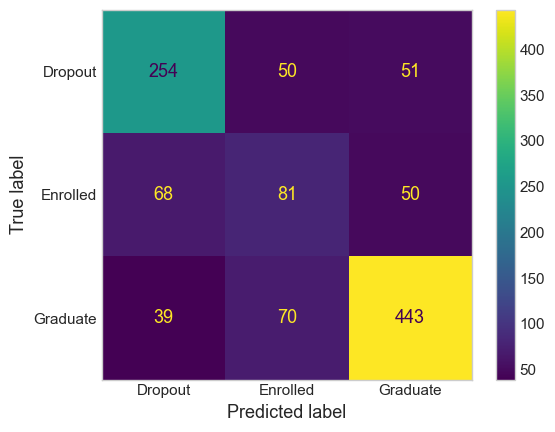

     True Label Predicted Label  Predicted Prob
1558    Dropout        Graduate        0.719406
1333   Enrolled         Dropout        0.663619
1545   Graduate        Enrolled        0.755341
517     Dropout        Enrolled        0.692179
3637   Enrolled        Graduate        0.500502
1141   Enrolled        Graduate        0.732970
1338    Dropout        Enrolled        0.804678
1717   Enrolled         Dropout        0.806152
1801   Graduate         Dropout        0.556791
2515   Enrolled         Dropout        0.513565
-----------------------------------------------
Total missclassified students: 328
Total length of the test set: 1106


In [ ]:
#Decode the predictions of XGBoost for better understandability
xgb_label_preds = le.inverse_transform(xgb_preds)
# Indices where predictions do not match true labels
misclassified_idx = np.where(xgb_label_preds != y_test)[0]

# Correctly classified indices 
correct_idx = np.where(xgb_label_preds == y_test)[0]

# Creating an Errors DataFrame
error_df = X_test.iloc[misclassified_idx].copy()
error_df['True Label'] = y_test.iloc[misclassified_idx].values  # original labels, not encoded
error_df['Predicted Label'] = xgb_label_preds[misclassified_idx]
error_df['Predicted Prob'] = np.max(xgb_proba[misclassified_idx], axis=1)
result_df = error_df[['True Label', 'Predicted Label', 'Predicted Prob']]

#Classification Report
print(classification_report(y_test, xgb_label_preds, target_names=le.classes_))

#Confussion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, xgb_label_preds)
ax = plt.gca()  
ax.grid(False)
plt.show()

print(result_df.head(10))
print('-----------------------------------------------')
print('Total missclassified students:', len(result_df))
print('Total length of the test set:', (len(y_test)))

* The model excels in classifying **Graduate students** (81% F1-score), also performs correctly with **Dropouts** (71% F1-score).
* **Enrolled** is the worse performing class, with an 41% F1-score. This is clearly represented at the confussion matrix where it missclassfies 68 Enrolled Students as Dropouts and 50 as Graduates compared to the 81 correctly classfied. This is also evident in the sample of the errors DataFrame, where from 10 misclassified cases from the errors DataFrame, 5 had "Enrolled" as the true label..
* The issue with **Enrolled** probably comes from the `Class Imbalance` also present in the test set (totals - Graduate: 552, Dropout: 355, Enrolled: 199).
* Overall, **29.7%** from the totality of the test set were missclassifications. 

### 6.3 Model Persistance

This step is just commited to save the best performing model in case it's deployed to production in the future.

In [167]:
import joblib

best_model = pipeline_xgboost
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

### 6.4 Conclusions

In this project, the [dataset](https://www.mdpi.com/2306-5729/7/11/146) gathered by the Research Center for Endogenous Resource Valorization,[Polytechnic Institute of Portalegre](https://www.ipportalegre.pt/pt/) was firstly analyzed, gaining a deep understanding of every aspect of it to then develop and evaluate a machine learning model to predict student dropout, graduation, and enrollment outcomes.

* After preprocessing, feature selection and model comparison, the **XGBoost pipeline** was the one selected, achieving a strong performance in the classification task, especially for the 'Graduate' and 'Dropout' classes.

* Overall performances achieved are **82.9%** in **training** and **70.4%** in test (F1-score).

* The model struggled with **'Enrolled'** class. During the Exploratory Data Analysis, class imbalance was detected that later clearly appeared during training and was dealt with. The testing phase confirmed this problem, as Error analysis revealed most misclassifications occurred with this exact class.

* Future work could focus on dealing with the class imbalance, more in-depth feature engineering or exploring alternative algorithms to further improve performance.

The project demonstrates the potential of data-driven approaches for early identifications of at-risk students, supporting timely interventions to improve educational quality.